# Exploratory data analysis of loan data from 2007-2009

The following analysis takes a look at the quarterly "Single Family Loans" datasets from Freddie mac over the time period of 2007-2009. Each quarter there is published origination data and performance data. 

Origination data has contains attributes of the loan and borrower(s) at the start of the loan. There are 26 data categories in the origination data files. These are: credit score, first payment date, first time homebuyer(flag), maturity data, metropolitatain statistical area, insurance percentage, number of units (i.e. multi family homes), occupancy status, original combined loan to value, original debt to income ratio, original unpaid principal balance, original loan to value, original interest rate, channel, prepayment penalty morgage (flag), product type, property state, property type, postal code, loan sequence number (relates origin to performance), loan purpose, original loan term, number of borrowers, seller name, servicer name, and super conforming.

Performance data contains financial performance information published monthly over the life of each loan. There are 26 data categories in the performance data files. The data is indexed by the loan sequence number and monthly reporting period. The categories published based on index are: current actual unpaid principal balance, current loan delinquency status, loan age, remaining months to legal maturity, repurchase flag, modification flag,zero balance code, zero balance effective date, current interest rate, current deferred unpaid principal balance, due date of last paid installment, MI recoveries, net sales proceeds, non MI recoveries, expenses, legal costs, maintenance and preservation costs, taxes and insurance, miscellaneous expenses, actual loss calculation, modification cost, step modification flag, deferred payment modification, and enhanced loan to value. Of these data categories, only 7 have consistent data present(with the exception of the indecies): current actual unpaid principal balance, current loan delinquency status, loan age, current interest rate, current deferred unpaid principal balance, and deferred payment modification.

In [1]:
!conda install -c conda-forge pandas-profiling -y 

!pip install missingno

Solving environment: done

# All requested packages already installed.



In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


In [68]:
badCreditList =[]

In [69]:
def countBadCredit(dataset):
    '''
    Takes the reference variable to a origination dataset and prints the percenage of borrowers
    with less than 600 credit score
    '''
    count = 0
    for i in dataset['Credit Score']:
        if (i<600):
            count += 1
        else:
            continue
    percentLow = (count/dataset['Credit Score'].count())*100
    badCreditList.append(percentLow)
    print(percentLow)
    print("There are {x} of {y} borrowers with less than 600 credit score".format(x = count, y=dataset['Credit Score'].count()))

In [164]:
delinquentList = []
def countDelinquentLoans(perfDataset):
    '''
    Takes a reference variable to a performance dataset and populates the percentage of 
    loan months that are delinquent into a list
    '''
    count = 0
    for i in perfDataset['Current Loan Delinquency Status']:
        if(i == '0'):
            continue
        elif(i == '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
             '16','17','18','19','20'):
            count+=1          
        else:
            continue
            
    percentDelinquent = (count/perfDataset['Current Loan Delinquency Status'].count())*100
    delinquentList.append(percentDelinquent)

## 2007 Quarter 1

In [3]:
origQ12007 = pd.read_table('historical_data1_Q12007/historical_data1_Q12007.txt', sep ='|')
origQ12007.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ12007.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,620,200705,9,203704,44140.0,0,1,P,73,32,...,MA,SF,1100.0,F107Q1000002,C,360,1,Other sellers,Other servicers,NaN
1,644,200703,Y,203702,35644.0,0,2,P,80,42,...,NJ,SF,7000.0,F107Q1000003,P,360,2,Other sellers,Other servicers,NaN
2,757,200703,N,203702,NaN,0,1,P,70,38,...,IN,SF,47500.0,F107Q1000004,C,360,1,Other sellers,Other servicers,NaN
3,800,200703,N,203702,NaN,0,1,P,43,37,...,ME,MH,4600.0,F107Q1000005,P,360,1,Other sellers,Other servicers,NaN
4,704,200703,N,203702,23844.0,0,1,P,87,41,...,IN,SF,46300.0,F107Q1000006,P,360,2,Other sellers,Other servicers,NaN


In [150]:
origQ12007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303803 entries, 0 to 303802
Data columns (total 26 columns):
Credit Score                  303803 non-null int64
First Payment Date            303803 non-null int64
First time homebuyer          303803 non-null object
Maturity Date                 303803 non-null int64
Metro Stat Area               253314 non-null float64
Insurance percentage          303803 non-null int64
No units                      303803 non-null int64
Occupancy status              303803 non-null object
Orig Combined LTV             303803 non-null int64
Orig DTI Ratio                303803 non-null int64
Orig UPB                      303803 non-null int64
Orig LTV                      303803 non-null int64
Orig Interest Rate            303803 non-null float64
Channel                       303803 non-null object
Prepayment Penalty Morgage    303440 non-null object
Product Type                  303803 non-null object
Property State                303803 non-null ob

Category datatypes come in handy when manipulating the data

In [4]:
origQ12007.describe()


,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,303803.000000,303803.000000,303803.000000,253314.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303803.000000,303802.000000,303803.000000,303803.000000,0.0
mean,729.224544,200704.475111,203527.195581,30099.895750,3.466562,1.030293,73.312894,54.879106,184325.233786,70.419203,6.206375,51000.929882,338.853843,1.585409,NaN
std,242.325819,7.635928,470.535701,11421.247902,9.031902,0.281689,20.869524,132.668973,96489.279154,19.585349,0.360681,28866.539245,56.453765,2.157455,NaN
min,300.000000,200701.000000,201202.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,3.500000,600.000000,60.000000,1.000000,NaN
25%,681.000000,200703.000000,203702.000000,19124.000000,0.000000,1.000000,63.000000,28.000000,110000.000000,62.000000,6.000000,28600.000000,360.000000,1.000000,NaN
50%,728.000000,200704.000000,203703.000000,31140.000000,0.000000,1.000000,79.000000,37.000000,164000.000000,76.000000,6.250000,48200.000000,360.000000,2.000000,NaN
75%,772.000000,200705.000000,203704.000000,39580.000000,0.000000,1.000000,87.000000,46.000000,243000.000000,80.000000,6.375000,77400.000000,360.000000,2.000000,NaN
max,9999.000000,201605.000000,205407.000000,49740.000000,40.000000,99.000000,999.000000,999.000000,802000.000000,999.000000,9.250000,99900.000000,569.000000,99.000000,NaN


Credit Score - There's some interesting stuff going on with this data. our standard deviation is being skewed by the "unavailable" credit scores. Most half of our borrowers have between 772 credit score and 681 credit score. 

First Payment Date-  Most borrowers wait 3 months before starting to pay their loan. This means the loan will gain interest over time

Insurance Percentage- The vast majority of loans do not use this field

Comb orig LTV- The average LTV is 73%, median is 79%

Orig DTI- Average DTI is 54%, median is 37% 

Orig UPB- Average unpaid balance is $184,325. Median is $164,000. 75% data under $243,000

Orig LTV - average 70%, majority of data lies between 62 and 80%

Orig Interest Rate- avg 6.2%, median 6.25% shows that more normally distributed. Standard deviation tighter at .36%

Average Loan term - loans range between 5 years and ~47 years(569/12). A large amount of loans are 30 year loans (360 months)



In [70]:
countBadCredit(origQ12007)


1.7820758847015994
There are 5414 of 303803 borrowers with less than 600 credit score


We can see that there are less than 2% of borrowers with "bad" credit score

In [5]:
origQ12007.shape

(303803, 26)

We have 300k entries in our dataset. 

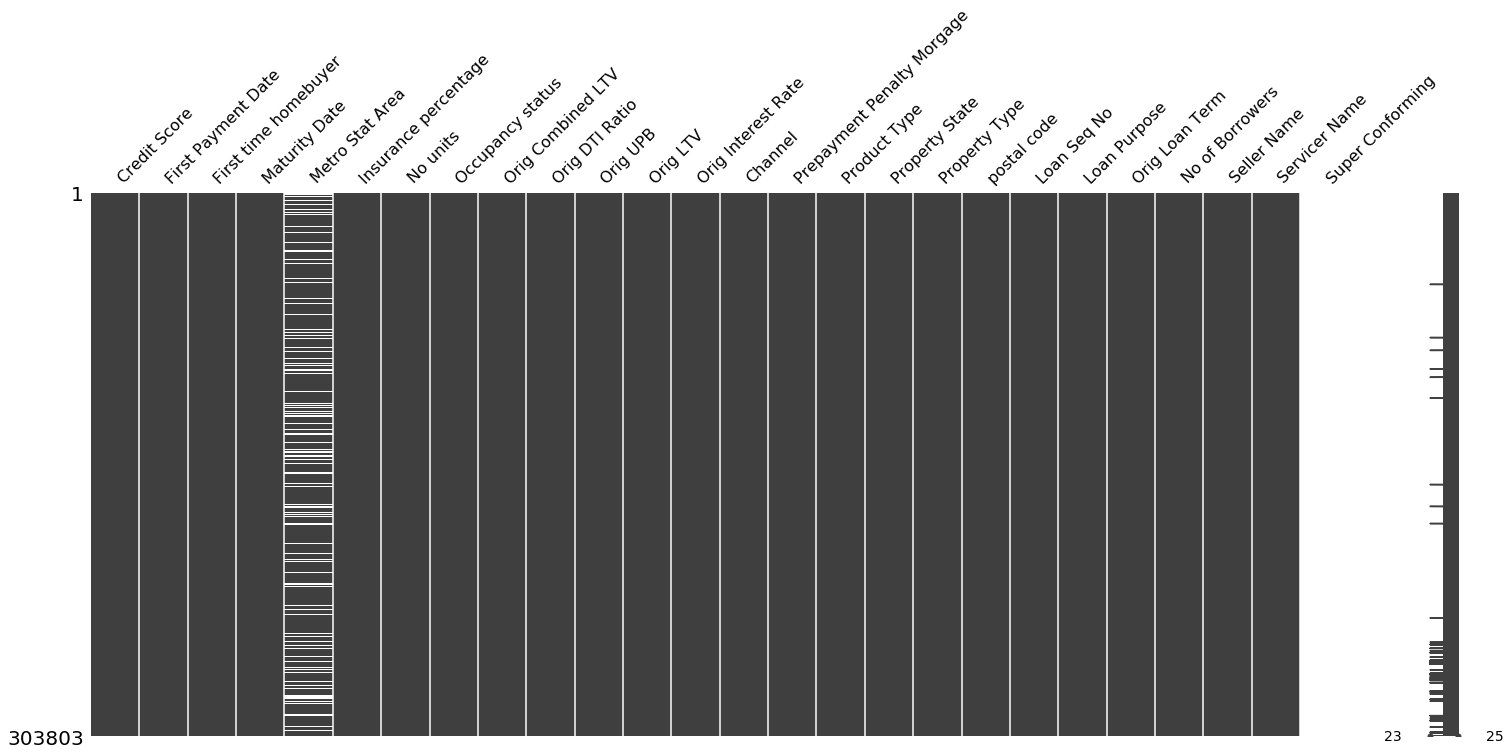

In [6]:
msno.matrix(origQ12007)

Most data catagories are readily available (or at filled with a not available value). "Metro Statitistical Area" and "Super Conforming" are categories with data that is not readily available

In [14]:
perfQ12007 = pd.read_table('historical_data1_Q12007/historical_data1_time_Q12007.txt', sep ='|')
perfQ12007.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ12007.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F107Q1000001,201703,50479.27,0,119,241,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F107Q1000001,201704,50373.98,0,120,240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,61.1
2,F107Q1000001,201705,50268.14,0,121,239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,60.3
3,F107Q1000001,201706,50161.75,0,122,238,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,53.6
4,F107Q1000001,201707,50054.81,0,123,237,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,52.2


In [151]:
perfQ12007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122891 entries, 0 to 18122890
Data columns (total 26 columns):
Loan Seq No                                  object
Monthly Reporting Period                     int64
Current Actual UPB                           float64
Current Loan Delinquency Status              object
Loan Age                                     int64
Remaining Months to Legal Maturity           int64
Repurchase Flag                              object
Modification Flag                            object
Zero Balance Code                            float64
Zero Balance Effective Date                  float64
Current Interest Rate                        float64
Current Deferred UPB                         float64
Due Date of Last Paid Installment (DDLPI)    float64
MI Recoveries                                float64
Net Sales Proceeds                           object
Non MI Recoveries                            float64
Expenses                                     flo

Category datatypes come in handy when manipulating the data

In [153]:
perfQ12007.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,1.812289e+07,1.812289e+07,1.812289e+07,1.812289e+07,272783.000000,272783.000000,1.812289e+07,1.812289e+07,36392.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,303780.000000,311569.000000
mean,2.010252e+05,1.622240e+05,4.159446e+01,3.043723e+02,1.661599,201110.759505,6.069708e+00,7.410383e+02,201122.581282,8953.110579,7659.764684,-14989.074518,-3233.050219,-4638.942886,-6445.180524,-671.928801,-85110.926293,1596.771510,59.795844
std,2.691621e+02,9.449071e+04,3.219047e+01,7.036101e+01,2.269397,244.809076,7.561182e-01,7.905164e+03,295.543985,21343.620120,31608.923604,15887.692352,2678.955967,7439.217250,10016.964488,3728.182482,66224.828535,9111.623532,26.550478
min,2.007020e+05,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000,200702.000000,0.000000e+00,0.000000e+00,200701.000000,0.000000,-115852.000000,-283171.000000,-100890.000000,-89092.000000,-146219.000000,-206014.000000,-661816.000000,-32870.350000,0.100000
25%,2.008070e+05,9.230511e+04,1.600000e+01,2.870000e+02,1.000000,200906.000000,5.875000e+00,0.000000e+00,200906.000000,0.000000,227.000000,-20131.000000,-4437.000000,-5633.000000,-8031.000000,-822.000000,-121956.000000,0.000000,42.800000
50%,2.010010e+05,1.431178e+05,3.400000e+01,3.230000e+02,1.000000,201102.000000,6.125000e+00,0.000000e+00,201010.000000,0.000000,1048.000000,-11066.000000,-2968.000000,-1761.000000,-3745.000000,-365.000000,-74938.000000,0.000000,60.400000
75%,2.012040e+05,2.167520e+05,6.100000e+01,3.450000e+02,1.000000,201302.000000,6.375000e+00,0.000000e+00,201212.000000,0.000000,2374.000000,-5159.000000,-1624.000000,-80.000000,-1433.000000,-220.000000,-36134.000000,0.000000,75.600000
max,2.018030e+05,8.020000e+05,1.330000e+02,5.690000e+02,15.000000,201803.000000,5.375000e+01,3.362461e+05,201801.000000,200497.000000,515249.000000,332862.000000,0.000000,9780.000000,343417.000000,225740.000000,250750.000000,218849.240000,554.000000


Current actual UPB- avg 162k and median 143k. mostly betwen 92k and 216k

Current interest rate- avg 6.07%, median 6.125%, majority between 5.875 and 6.375

In [15]:
perfQ12007.shape

(18122891, 26)

We have 18M enteries for this dataset. Running missing number visualization will overload the kernel. We will run on a subset of 500k and see what we get.

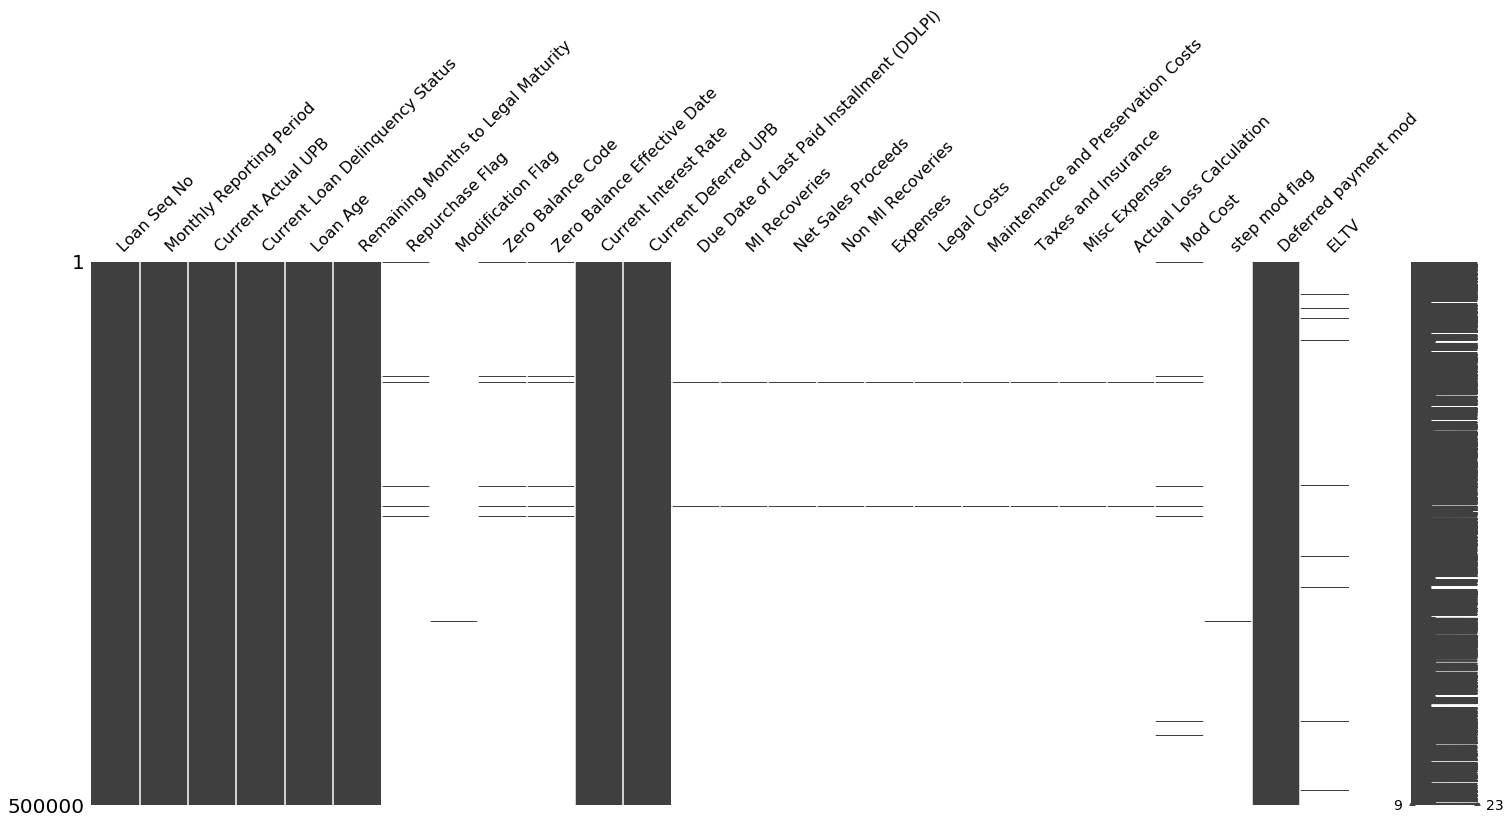

In [16]:
msno.matrix(perfQ12007.sample(500000))

Of our 26 data categories, we only have 9 with consistent data available. Our consistently available data includes the loan sequence number, monthly reporting period, current actual unpaid principal balance, current loan delinquency status, loan age, remaining months to maturity, current interest rate, current deferred unpaid principal balance, and deferred payment mod. The data categories that aren't consistently available are for speicific occurances in the loan (i.e. the loan being paid off by borrower or being sold from Freddie Mac to another lender)

## 2007 Quarter 2

In [15]:
origQ22007 = pd.read_table('historical_data1_Q22007/historical_data1_Q22007.txt', sep ='|')
origQ22007.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ22007.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,787,200706,N,203705,48300.0,30,1,P,95,26,...,WA,MH,98800,F107Q2000002,P,360,2,Other sellers,Other servicers,NaN
1,755,200706,N,203705,38860.0,0,1,P,33,29,...,ME,SF,4000,F107Q2000003,C,360,1,Other sellers,Other servicers,NaN
2,710,200706,N,203705,19380.0,30,1,P,92,47,...,OH,SF,45300,F107Q2000004,N,360,1,Other sellers,USBANKNA,NaN
3,800,200706,N,203705,31540.0,0,1,P,67,59,...,WI,SF,53900,F107Q2000005,N,360,2,Other sellers,Other servicers,NaN
4,673,200706,N,203705,15804.0,0,1,P,78,22,...,NJ,SF,8000,F107Q2000006,N,360,1,Other sellers,USBANKNA,NaN


In [18]:
origQ22007.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,345373.000000,345373.000000,345373.000000,285289.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,345373.000000,0.0
mean,730.015522,200707.756750,203548.563570,29887.410500,4.566683,1.028922,75.065842,58.168314,181316.883485,72.033384,6.293963,50790.387205,341.029423,1.577292,NaN
std,265.808270,10.066567,456.477026,11405.791739,10.236282,0.214550,21.619936,143.612968,95815.150602,20.154368,0.391943,28457.283488,54.756698,2.064588,NaN
min,373.000000,200704.000000,201205.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,5000.000000,6.000000,2.625000,600.000000,60.000000,1.000000,NaN
25%,680.000000,200706.000000,203705.000000,19124.000000,0.000000,1.000000,65.000000,28.000000,107000.000000,64.000000,6.000000,28700.000000,360.000000,1.000000,NaN
50%,728.000000,200707.000000,203706.000000,31084.000000,0.000000,1.000000,80.000000,37.000000,160000.000000,78.000000,6.250000,48100.000000,360.000000,2.000000,NaN
75%,773.000000,200708.000000,203707.000000,39540.000000,0.000000,1.000000,90.000000,46.000000,238000.000000,80.000000,6.500000,77000.000000,360.000000,2.000000,NaN
max,9999.000000,201602.000000,205109.000000,49740.000000,40.000000,4.000000,999.000000,999.000000,802000.000000,999.000000,9.125000,99900.000000,530.000000,99.000000,NaN


Credit score- avg 730, median 728, close alignment with first quarter

First payment date- there is a larger first payment standard deviation than 1st quarter

Orig comb LTV- avg 75%, median 80%, shows slight increase over first quarter in the value of the loan in relation to the value

Orig DTI Ratio- avg 58%, median 37% (most between 46% and 28%)

Loan term still typical 30 year

In [19]:
origQ22007.shape

(345373, 26)

We have 345k entries in our q2 dataset

In [71]:
countBadCredit(origQ22007)

2.096573849142811
There are 7241 of 345373 borrowers with less than 600 credit score


There was a rise from 1.8% to 2.1% in borrowers with a "bad" credit score

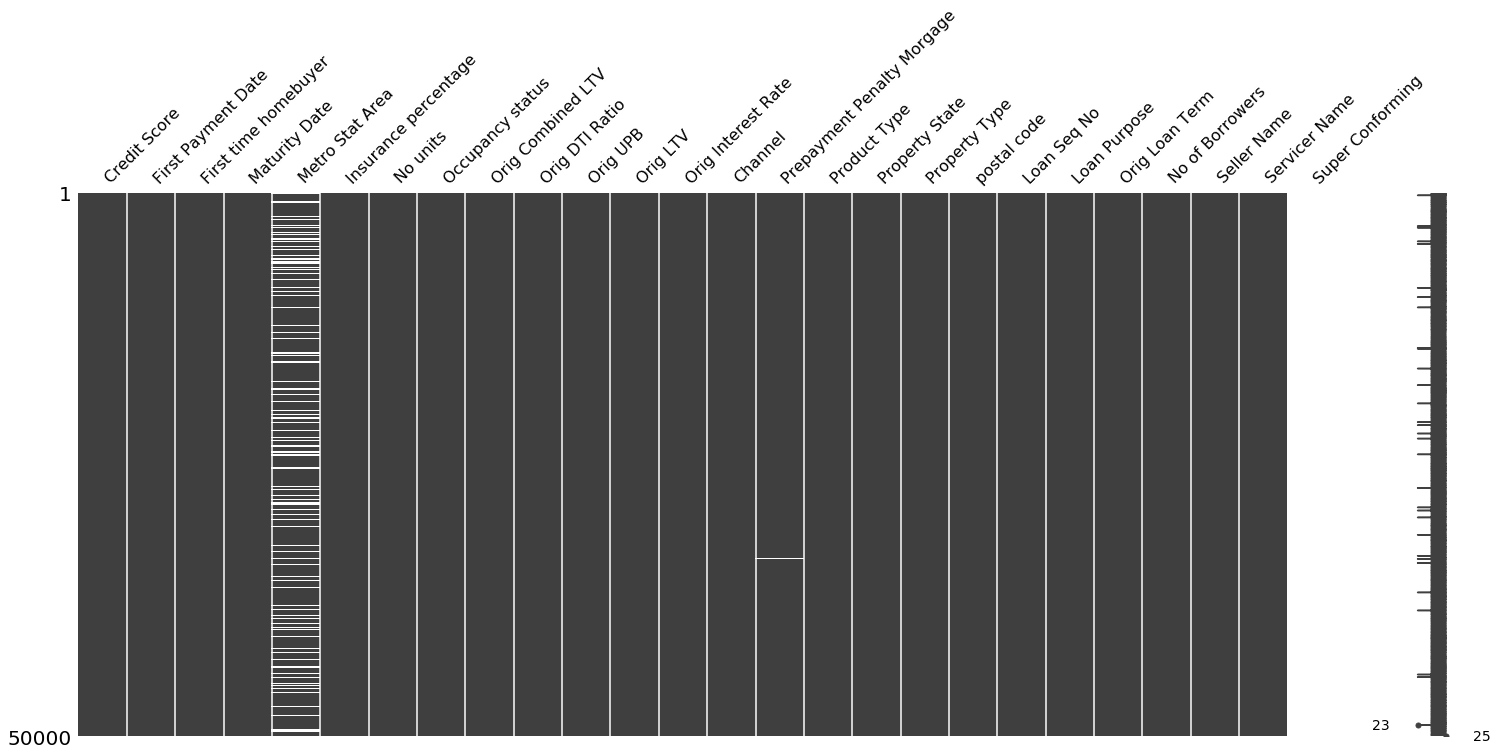

In [20]:
msno.matrix(origQ22007.sample(500000))

We're seeing consistent results compared to 1st quarter. We'll run at the first quarter every year to maintain consistency of missing data

In [16]:
perfQ22007 = pd.read_table('historical_data1_Q22007/historical_data1_time_Q22007.txt', sep ='|')
perfQ22007.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ22007.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F107Q2000001,200707,104000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F107Q2000001,200708,104000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F107Q2000001,200709,104000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F107Q2000001,200710,104000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F107Q2000001,200711,104000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [22]:
perfQ22007.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,2.009391e+07,2.009391e+07,2.009391e+07,2.009391e+07,308988.000000,308988.000000,2.009391e+07,2.009391e+07,43960.000000,32206.000000,32206.000000,32206.000000,32206.000000,32206.000000,32206.000000,32206.000000,32206.000000,345344.000000,366840.000000
mean,2.010416e+05,1.593616e+05,4.078196e+01,3.080046e+02,1.708186,201119.748320,6.142133e+00,7.953865e+02,201127.983235,12089.468608,8543.252065,-15268.013010,-3258.203223,-4721.281376,-6638.982239,-649.571353,-82611.763305,1723.941522,62.241711
std,2.663869e+02,9.368400e+04,3.173102e+01,6.890225e+01,2.328760,241.496633,7.998028e-01,7.985098e+03,296.622413,25191.020961,34503.149113,15747.325439,2577.298338,7386.414906,10010.165496,3162.060650,66442.079290,9596.928294,26.680620
min,2.007050e+05,0.000000e+00,0.000000e+00,-1.200000e+01,1.000000,200705.000000,0.000000e+00,0.000000e+00,200702.000000,0.000000,-93674.000000,-222391.000000,-46774.000000,-100118.000000,-186844.000000,-62413.000000,-595678.000000,-78675.710000,0.000000
25%,2.008090e+05,9.002882e+04,1.500000e+01,2.910000e+02,1.000000,200907.000000,6.000000e+00,0.000000e+00,200907.000000,0.000000,233.000000,-20554.500000,-4471.000000,-5843.750000,-8271.000000,-822.000000,-118416.000000,0.000000,46.000000
50%,2.010030e+05,1.397394e+05,3.300000e+01,3.250000e+02,1.000000,201103.000000,6.250000e+00,0.000000e+00,201010.000000,0.000000,1062.000000,-11265.000000,-2982.500000,-1858.000000,-3827.000000,-370.000000,-71882.000000,0.000000,62.600000
75%,2.012050e+05,2.120000e+05,5.900000e+01,3.460000e+02,1.000000,201303.000000,6.500000e+00,0.000000e+00,201301.000000,4257.250000,2422.000000,-5379.750000,-1675.000000,-90.000000,-1491.000000,-220.000000,-33387.000000,0.000000,77.800000
max,2.018030e+05,8.020000e+05,1.300000e+02,5.560000e+02,15.000000,201803.000000,9.999900e+01,3.364000e+05,201801.000000,223461.000000,511239.000000,244886.000000,174.000000,1468.000000,258903.000000,224890.000000,73871.000000,211861.940000,290.600000


Current acutal UPB- avg 160k, mean 140k, majority  between 212k and 90k.

Current Interest Rate - avg 6.14, mean 6.25. majority between 6.5 and 6.0

In [68]:
perfQ22007.shape

(20093907, 26)

We have 20M data entries (which will surely crash the kernel if put into the missingno package). We will take a  500k sample from the dataset

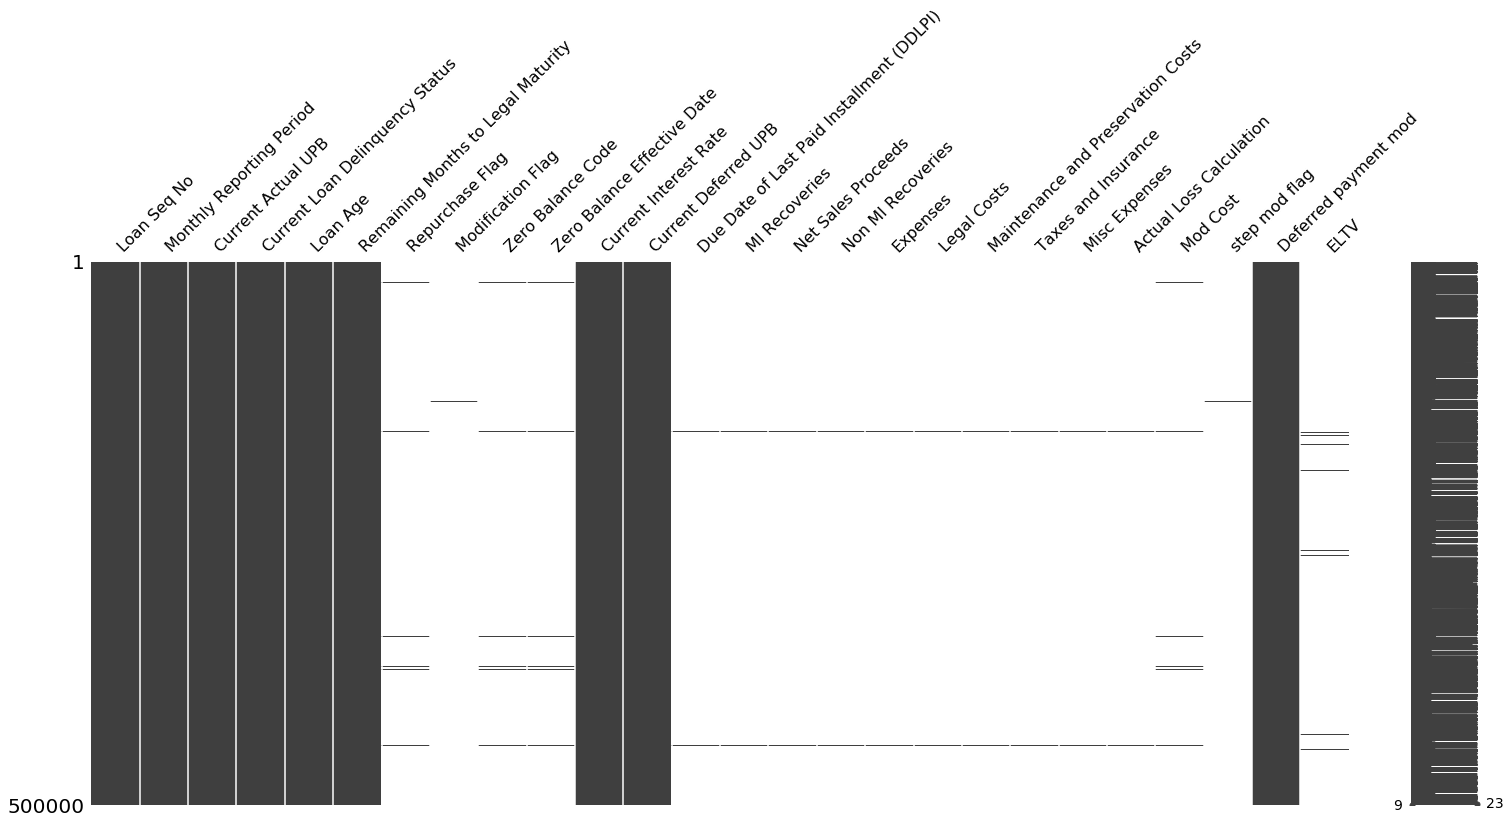

In [69]:
msno.matrix(perfQ22007.sample(500000))

Looking at the missing numbers, we're seeing the same 9 categories show up with consistently available values.

## 2007 Quarter 3

In [17]:
origQ32007 = pd.read_table('historical_data1_Q32007/historical_data1_Q32007.txt', sep ='|')
origQ32007.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ32007.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,752,200709,N,203708,20764.0,0,1,P,80,20,...,NJ,CO,8800.0,F107Q3000002,P,360,1,Other sellers,Other servicers,NaN
1,700,200709,N,203708,39580.0,0,1,P,83,28,...,NC,SF,27600.0,F107Q3000003,P,360,2,USBANKNA,USBANKNA,NaN
2,736,200710,N,203709,NaN,30,1,P,92,39,...,IN,SF,47400.0,F107Q3000004,N,360,2,Other sellers,Other servicers,NaN
3,633,200711,N,203710,48300.0,0,1,P,71,35,...,WA,SF,98800.0,F107Q3000005,N,360,2,Other sellers,Other servicers,NaN
4,778,200709,N,203708,36980.0,0,1,P,50,16,...,KY,SF,42300.0,F107Q3000006,C,360,2,Other sellers,Other servicers,NaN


In [18]:
origQ32007.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,282688.000000,282688.000000,282688.000000,231844.000000,282688.000000,282688.000000,282688.000000,282688.000000,282688.000000,282688.000000,282688.000000,282687.000000,282688.000000,282688.000000,0.0
mean,727.895776,200711.184433,203566.142461,29623.822993,6.228039,1.033503,75.911896,64.580520,177543.719578,73.510050,6.663524,50524.712491,342.726055,1.568461,NaN
std,232.319580,12.438722,443.375202,11367.550211,11.776328,0.348026,20.117216,160.440704,96331.355873,19.001156,0.385626,27988.873288,53.180857,2.109200,NaN
min,351.000000,200501.000000,201208.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,5000.000000,6.000000,3.375000,600.000000,58.000000,1.000000,NaN
25%,678.000000,200709.000000,203708.000000,18580.000000,0.000000,1.000000,67.000000,29.000000,105000.000000,66.000000,6.375000,29000.000000,360.000000,1.000000,NaN
50%,728.000000,200710.000000,203709.000000,30780.000000,0.000000,1.000000,80.000000,38.000000,154000.000000,80.000000,6.625000,48100.000000,360.000000,2.000000,NaN
75%,773.000000,200711.000000,203710.000000,39300.000000,0.000000,1.000000,90.000000,47.000000,232000.000000,80.000000,6.875000,76000.000000,360.000000,2.000000,NaN
max,9999.000000,201602.000000,205006.000000,49740.000000,999.000000,99.000000,999.000000,999.000000,801000.000000,999.000000,9.875000,99900.000000,513.000000,99.000000,NaN


Credit Score - avg 727, median 728, majority between 773 and 678

First Payment date- now has a std of 12 months. I believe we're seeing an increase of loans deferring their first payment longer

Orig Comb LTV - 

In [72]:
countBadCredit(origQ32007)

2.0191872311523658
There are 5708 of 282688 borrowers with less than 600 credit score


Decrease from 2.1% to 2.0% (Q2 to Q3)

In [26]:
perfQ32007 = pd.read_table('historical_data1_Q32007/historical_data1_time_Q32007.txt', sep ='|')
perfQ32007.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ32007.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F107Q3000001,200711,193000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F107Q3000001,200712,193000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F107Q3000001,200801,193000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F107Q3000001,200802,193000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F107Q3000001,200803,193000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [27]:
perfQ32007.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,1.452743e+07,1.452743e+07,1.452743e+07,1.452743e+07,255823.000000,255823.000000,1.452743e+07,1.452743e+07,36305.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,282659.000000,270664.000000
mean,2.010498e+05,1.537753e+05,3.871384e+01,3.121119e+02,1.722195,201091.161725,6.481214e+00,8.762409e+02,201117.549070,16662.179435,9896.498278,-15273.270875,-3301.653261,-4712.049652,-6614.800157,-644.797087,-78239.278290,1879.577634,63.921429
std,2.622032e+02,9.337802e+04,3.122227e+01,6.816265e+01,2.329748,241.336535,9.057563e-01,8.542377e+03,291.596537,29461.968905,38858.563903,15298.273503,2586.602715,7169.696793,9683.012403,3383.550313,66656.500911,10447.516093,26.785044
min,2.007080e+05,0.000000e+00,0.000000e+00,-3.200000e+01,1.000000,200708.000000,0.000000e+00,0.000000e+00,200707.000000,0.000000,-275670.000000,-202304.000000,-70304.000000,-78990.000000,-183733.000000,-110236.000000,-804712.000000,-118254.000000,0.000000
25%,2.008110e+05,8.621129e+04,1.300000e+01,2.960000e+02,1.000000,200905.000000,6.375000e+00,0.000000e+00,200906.000000,0.000000,199.250000,-20541.000000,-4499.750000,-5880.000000,-8310.750000,-832.000000,-112110.000000,0.000000,47.800000
50%,2.010040e+05,1.330000e+05,3.100000e+01,3.290000e+02,1.000000,201010.000000,6.625000e+00,0.000000e+00,201009.000000,0.000000,1072.000000,-11410.000000,-3035.000000,-2033.500000,-3888.500000,-372.000000,-67071.500000,0.000000,64.300000
75%,2.012060e+05,2.028213e+05,5.700000e+01,3.480000e+02,1.000000,201212.000000,6.875000e+00,0.000000e+00,201211.000000,27090.250000,2555.000000,-5580.250000,-1723.000000,-105.000000,-1530.250000,-245.000000,-29101.250000,0.000000,79.300000
max,2.018030e+05,8.762575e+05,1.270000e+02,5.640000e+02,15.000000,201803.000000,6.250000e+01,3.490000e+05,201801.000000,194848.000000,469585.000000,278559.000000,800.000000,1159.000000,156008.000000,325722.000000,138237.000000,200448.390000,442.400000


## 2007 Quarter 4

In [28]:
origQ42007 = pd.read_table('historical_data1_Q42007/historical_data1_Q42007.txt', sep ='|')
origQ42007.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ42007.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,757,200712,N,203711,NaN,0,1,P,80,24,...,MN,SF,56300.0,F107Q4000002,N,360,2,Other sellers,USBANKNA,NaN
1,696,200802,N,203801,24780.0,0,1,P,75,30,...,NC,SF,28500.0,F107Q4000003,N,360,1,Other sellers,Other servicers,NaN
2,696,200801,N,203712,NaN,0,1,S,70,33,...,IA,MH,51300.0,F107Q4000004,N,360,2,Other sellers,Other servicers,NaN
3,781,200712,N,203711,NaN,0,1,S,74,22,...,CO,SF,81200.0,F107Q4000005,N,360,2,Other sellers,USBANKNA,NaN
4,675,200712,N,203711,NaN,30,1,P,90,43,...,IN,MH,47500.0,F107Q4000006,N,360,1,Other sellers,Other servicers,NaN


In [29]:
origQ42007.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,288714.000000,288714.000000,288714.000000,240470.000000,288714.000000,288714.000000,288714.000000,288714.000000,288714.000000,288714.000000,288714.000000,288713.000000,288714.000000,288714.000000,0.0
mean,728.293186,200771.955312,203565.263863,30140.446484,6.029915,1.043822,73.897217,69.008198,190809.406541,72.401446,6.357440,51936.857364,338.427201,1.570121,NaN
std,227.453438,42.941286,482.190769,11340.125076,11.326133,0.326776,20.582767,172.090744,103992.446830,20.331583,0.442533,29005.846452,57.581484,2.233013,NaN
min,300.000000,200710.000000,201211.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,9000.000000,6.000000,2.750000,600.000000,59.000000,1.000000,NaN
25%,680.000000,200712.000000,203711.000000,19124.000000,0.000000,1.000000,65.000000,28.000000,110000.000000,63.000000,6.125000,29000.000000,360.000000,1.000000,NaN
50%,729.000000,200801.000000,203712.000000,31180.000000,0.000000,1.000000,80.000000,38.000000,168000.000000,78.000000,6.375000,49300.000000,360.000000,2.000000,NaN
75%,774.000000,200802.000000,203801.000000,39580.000000,0.000000,1.000000,89.000000,48.000000,253000.000000,80.000000,6.625000,78400.000000,360.000000,2.000000,NaN
max,9999.000000,201602.000000,205507.000000,49740.000000,40.000000,99.000000,999.000000,999.000000,802000.000000,999.000000,9.250000,99900.000000,570.000000,99.000000,NaN


In [73]:
countBadCredit(origQ42007)

2.219151132262377
There are 6407 of 288714 borrowers with less than 600 credit score


Borrowers with bad creadit increased to 2.22% (1.78, 2.1,2.0,2.22 for year)

In [30]:
perfQ42007 = pd.read_table('historical_data1_Q42007/historical_data1_time_Q42007.txt', sep ='|')
perfQ42007.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ42007.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F107Q4000001,200712,144000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F107Q4000001,200801,144000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F107Q4000001,200802,144000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F107Q4000001,200803,143000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F107Q4000001,200804,143000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [30]:
perfQ42007.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,1.525379e+07,1.525379e+07,1.525379e+07,1.525379e+07,258502.000000,258502.000000,1.525379e+07,1.525379e+07,37967.000000,27835.000000,27835.000000,27835.000000,27835.000000,27835.000000,27835.000000,27835.000000,27835.000000,288681.000000,309545.000000
mean,2.010743e+05,1.651040e+05,3.842918e+01,3.087118e+02,1.753750,201123.286512,6.175264e+00,1.064254e+03,201126.191824,17250.569714,12044.372948,-15588.194503,-3270.534902,-4757.975355,-6958.175606,-601.536986,-81866.593749,2102.746278,62.563936
std,2.559977e+02,1.013685e+05,3.070773e+01,7.160546e+01,2.391295,234.817942,9.085404e-01,9.763226e+03,291.619388,30587.249055,45586.766457,16755.791055,2706.742501,7426.813114,10637.279390,5693.276653,71662.629698,11166.008984,27.150571
min,2.007110e+05,0.000000e+00,0.000000e+00,-3.100000e+01,1.000000,200711.000000,0.000000e+00,0.000000e+00,200611.000000,0.000000,-356254.000000,-208681.000000,-110866.000000,-98761.000000,-194258.000000,-96142.000000,-712418.000000,-6765.430000,0.000000
25%,2.009020e+05,8.969219e+04,1.400000e+01,2.930000e+02,1.000000,200908.000000,6.000000e+00,0.000000e+00,200907.000000,0.000000,182.000000,-20949.500000,-4489.000000,-5887.500000,-8670.500000,-842.000000,-117767.000000,0.000000,45.400000
50%,2.010070e+05,1.422627e+05,3.100000e+01,3.280000e+02,1.000000,201103.000000,6.375000e+00,0.000000e+00,201010.000000,0.000000,1101.000000,-11564.000000,-3000.000000,-1947.000000,-3995.000000,-370.000000,-68944.000000,0.000000,62.800000
75%,2.012080e+05,2.218880e+05,5.600000e+01,3.480000e+02,1.000000,201302.000000,6.625000e+00,0.000000e+00,201212.000000,27706.500000,2794.000000,-5477.000000,-1601.000000,-90.000000,-1478.000000,-240.000000,-28767.500000,0.000000,78.200000
max,2.018030e+05,8.187220e+05,1.240000e+02,5.700000e+02,15.000000,201803.000000,6.000000e+01,3.957869e+05,201801.000000,231610.000000,592837.000000,491394.000000,318.000000,3305.000000,206940.000000,596999.000000,117077.000000,242335.340000,478.300000


Current UPB - avg 165K, meedian 142K. Staying consistent with year

Current Interest rate - avg 6.17, median 6.37%. Majority between 6.625 and 6

## 2008 Quarter 1

In [31]:
origQ12008 = pd.read_table('historical_data1_Q12008/historical_data1_Q12008.txt', sep ='|')
origQ12008.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ12008.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,729,200805,N,203804,17140.0,0,1,P,73,20,...,OH,SF,45200.0,F108Q1000002,C,360,1,Other sellers,Other servicers,NaN
1,769,200803,N,203802,NaN,0,1,P,59,17,...,KY,SF,40300.0,F108Q1000003,C,360,1,Other sellers,Other servicers,NaN
2,755,200803,Y,203802,NaN,35,1,P,100,28,...,PA,SF,17900.0,F108Q1000004,P,360,1,Other sellers,Other servicers,NaN
3,760,200804,N,203803,48300.0,0,1,P,74,58,...,WA,SF,98800.0,F108Q1000005,C,360,1,Other sellers,Other servicers,NaN
4,781,200803,N,203802,NaN,0,1,P,80,32,...,KS,SF,67800.0,F108Q1000006,N,360,1,Other sellers,Other servicers,NaN


In [32]:
origQ12008.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,398146.000000,398146.000000,398146.000000,336072.000000,398146.000000,398146.000000,398146.000000,398146.000000,398146.000000,398146.00000,398146.000000,398144.000000,398146.000000,398146.000000,0.0
mean,737.541550,200804.348096,203516.743883,30295.621730,4.271687,1.036703,71.167830,62.073641,203220.426678,69.63054,5.878392,52526.370107,325.622478,1.593634,NaN
std,157.821065,5.904933,579.144507,11326.832601,9.994494,0.291049,19.428968,156.593305,106040.899399,19.26609,0.504819,29573.863271,69.491092,2.113584,NaN
min,320.000000,200801.000000,201302.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,6000.000000,6.00000,2.750000,600.000000,60.000000,1.000000,NaN
25%,698.000000,200804.000000,203802.000000,19124.000000,0.000000,1.000000,61.000000,27.000000,120000.000000,60.00000,5.625000,28600.000000,360.000000,1.000000,NaN
50%,745.000000,200804.000000,203803.000000,32780.000000,0.000000,1.000000,76.000000,36.000000,181000.000000,75.00000,5.875000,53000.000000,360.000000,2.000000,NaN
75%,780.000000,200805.000000,203804.000000,40060.000000,0.000000,1.000000,80.000000,46.000000,273000.000000,80.00000,6.125000,80100.000000,360.000000,2.000000,NaN
max,9999.000000,201606.000000,205305.000000,49740.000000,999.000000,99.000000,999.000000,999.000000,802000.000000,999.00000,9.000000,99900.000000,542.000000,99.000000,NaN


In [74]:
countBadCredit(origQ12008)

1.1932808567711344
There are 4751 of 398146 borrowers with less than 600 credit score


Stark decrease to 1.2% of loans with bad credit (2007 was around 2%)

In [34]:
perfQ12008 = pd.read_table('historical_data1_Q12008/historical_data1_time_Q12008.txt', sep ='|')
perfQ12008.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ12008.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F108Q1000001,200803,271000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F108Q1000001,200804,271000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F108Q1000001,200805,271000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F108Q1000001,200806,270000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F108Q1000001,200807,270000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [35]:
perfQ12008.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,2.071268e+07,2.071268e+07,2.071268e+07,2.071268e+07,358186.000000,358186.000000,2.071268e+07,2.071268e+07,36380.000000,25019.000000,25019.000000,25019.000000,25019.000000,25019.000000,25019.000000,25019.000000,25019.000000,398091.000000,418000.000000
mean,2.010835e+05,1.742071e+05,3.658494e+01,2.953092e+02,1.485664,201143.520118,5.767700e+00,7.447487e+02,201159.431638,14369.432871,10700.110996,-15681.536352,-3229.757424,-4738.031456,-7081.465486,-632.303849,-82218.715736,1383.184163,55.952772
std,2.466524e+02,1.042116e+05,2.948317e+01,8.021988e+01,1.954648,218.208438,7.800624e-01,8.130158e+03,291.083389,27628.477483,42355.437045,17741.879461,2687.620834,7630.571635,11671.896995,5617.632479,71995.550694,8876.801409,26.550877
min,2.008020e+05,0.000000e+00,0.000000e+00,-4.000000e+00,1.000000,200802.000000,0.000000e+00,0.000000e+00,200801.000000,0.000000,-10212.000000,-222638.000000,-49931.000000,-72234.000000,-158726.000000,-96396.000000,-683034.000000,-195114.940000,0.000000
25%,2.009040e+05,9.556432e+04,1.300000e+01,2.740000e+02,1.000000,201003.000000,5.500000e+00,0.000000e+00,200910.000000,0.000000,218.000000,-21398.500000,-4457.000000,-5841.500000,-8836.500000,-885.000000,-116705.500000,0.000000,36.900000
50%,2.010080e+05,1.523117e+05,2.900000e+01,3.240000e+02,1.000000,201107.000000,5.875000e+00,0.000000e+00,201103.000000,0.000000,1102.000000,-11339.000000,-2964.000000,-1591.000000,-3931.000000,-380.000000,-68856.000000,0.000000,57.100000
75%,2.012080e+05,2.370264e+05,5.300000e+01,3.460000e+02,1.000000,201302.000000,6.125000e+00,0.000000e+00,201306.000000,19467.500000,2605.000000,-5076.000000,-1509.000000,-80.000000,-1425.500000,-220.000000,-30541.000000,0.000000,72.600000
max,2.018030e+05,8.020000e+05,1.210000e+02,5.420000e+02,15.000000,201803.000000,5.875000e+01,5.018843e+05,201801.000000,175307.000000,589418.000000,503297.000000,889.000000,1426.000000,510225.000000,479883.000000,150890.000000,289251.610000,400.700000


Current UPB - avg 174k, median 150. Increasing over 2007

Current interest rate - avg 5.76, median 5.875. Decrease over 2007

## 2008 Quarter 2

In [36]:
origQ22008 = pd.read_table('historical_data1_Q22008/historical_data1_Q22008.txt', sep ='|')
origQ22008.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ22008.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,813,200807,N,203806,NaN,0,1,P,80,18,...,OH,SF,45800.0,F108Q2000002,P,360,2,Other sellers,USBANKNA,NaN
1,781,200806,N,203805,NaN,25,1,P,87,27,...,OH,SF,45800.0,F108Q2000003,N,360,2,Other sellers,Other servicers,NaN
2,788,200807,N,203806,35980.0,0,1,P,78,37,...,CT,SF,6400.0,F108Q2000004,P,360,2,Other sellers,Other servicers,NaN
3,716,200806,N,203805,NaN,0,1,P,43,7,...,NH,SF,3800.0,F108Q2000005,N,360,1,Other sellers,USBANKNA,NaN
4,741,200806,Y,203805,35644.0,30,2,P,95,57,...,NJ,SF,7500.0,F108Q2000006,P,360,2,Other sellers,Other servicers,NaN


In [37]:
origQ22008.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,361407.000000,361407.000000,361407.000000,303645.000000,361407.000000,361407.000000,361407.000000,361407.000000,361407.000000,361407.000000,361407.000000,361405.000000,361407.000000,361407.000000,0.0
mean,743.441154,200807.426312,203566.656689,30250.788480,4.464391,1.039058,71.190896,59.645997,202228.111243,69.854884,6.023503,53056.657213,331.238554,1.578948,NaN
std,191.167055,8.848175,537.784990,11277.752189,9.735108,0.256559,19.047686,147.692705,109853.754473,19.024841,0.474097,29833.848965,64.516069,2.183542,NaN
min,300.000000,200501.000000,201305.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,2.625000,600.000000,60.000000,1.000000,NaN
25%,704.000000,200806.000000,203805.000000,19124.000000,0.000000,1.000000,60.000000,27.000000,115000.000000,59.000000,5.750000,28600.000000,360.000000,1.000000,NaN
50%,749.000000,200807.000000,203806.000000,31540.000000,0.000000,1.000000,76.000000,37.000000,180000.000000,75.000000,5.990000,53100.000000,360.000000,2.000000,NaN
75%,782.000000,200808.000000,203807.000000,40060.000000,0.000000,1.000000,80.000000,47.000000,272000.000000,80.000000,6.250000,80500.000000,360.000000,2.000000,NaN
max,9999.000000,201510.000000,205705.000000,49740.000000,40.000000,4.000000,999.000000,999.000000,802000.000000,999.000000,9.625000,99900.000000,588.000000,99.000000,NaN


Credit score- avg 743, median 749. There is an increase in the credit scores approved for loans

Orig LTV- avg 70%, median 75%

Interest rate- avg 6.02, median 5.99

In [75]:
countBadCredit(origQ22008)

0.6718187528188442
There are 2428 of 361407 borrowers with less than 600 credit score


.67% much less than 2007 (around 2%)

In [39]:
perfQ22008 = pd.read_table('historical_data1_Q22008/historical_data1_time_Q22008.txt', sep ='|')
perfQ22008.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ22008.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F108Q2000001,200808,218000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F108Q2000001,200809,218000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F108Q2000001,200810,217000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F108Q2000001,200811,217000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F108Q2000001,200812,217000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [70]:
perfQ22008.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,1.743480e+07,1.743480e+07,1.743480e+07,1.743480e+07,326416.000000,326416.000000,1.743480e+07,1.743480e+07,27778.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,361354.000000,356899.000000
mean,2.010953e+05,1.690292e+05,3.535357e+01,2.991605e+02,1.393918,201136.823517,5.924524e+00,5.505264e+02,201172.700878,13143.044525,11995.861297,-16004.626557,-3283.354168,-4843.469368,-7239.852843,-637.973173,-76093.172068,1112.651023,53.523493
std,2.431947e+02,1.054837e+05,2.891439e+01,7.688681e+01,1.764895,214.600215,7.588861e-01,7.106672e+03,291.600110,25849.043543,46196.515080,17606.276469,2698.597391,7713.090977,11444.145752,5527.121001,70837.339664,8036.250056,25.072530
min,2.008050e+05,0.000000e+00,0.000000e+00,-2.800000e+01,1.000000,200805.000000,0.000000e+00,0.000000e+00,200012.000000,0.000000,-323423.000000,-213232.000000,-73705.000000,-141727.000000,-181478.000000,-142559.000000,-682692.000000,-103438.910000,0.000000
25%,2.009060e+05,8.980653e+04,1.200000e+01,2.820000e+02,1.000000,201002.000000,5.750000e+00,0.000000e+00,200911.000000,0.000000,197.500000,-21927.500000,-4513.000000,-5951.500000,-8964.500000,-945.000000,-107332.000000,0.000000,35.800000
50%,2.010100e+05,1.463279e+05,2.800000e+01,3.270000e+02,1.000000,201105.000000,5.875000e+00,0.000000e+00,201104.000000,0.000000,1081.000000,-11660.000000,-2996.000000,-1751.000000,-4025.000000,-390.000000,-62238.000000,0.000000,54.200000
75%,2.012090e+05,2.291916e+05,5.100000e+01,3.470000e+02,1.000000,201301.000000,6.250000e+00,0.000000e+00,201309.000000,16452.500000,2645.000000,-5363.000000,-1596.000000,-90.000000,-1465.500000,-220.000000,-25179.500000,0.000000,69.400000
max,2.018030e+05,9.157529e+05,1.180000e+02,5.880000e+02,15.000000,201803.000000,5.250000e+01,4.908000e+05,201801.000000,224716.000000,515168.000000,412000.000000,891.000000,1160.000000,355617.000000,412000.000000,135813.000000,358293.410000,910.300000


Current UPB - avg 170k, median 146k
urrent interest rate- avg 5.92, median 5.875. consistent with year

## 2008 Quarter 3

In [40]:
origQ32008 = pd.read_table('historical_data1_Q32008/historical_data1_Q32008.txt', sep ='|')
origQ32008.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ32008.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,696,200809,Y,203808,14484.0,0,1,P,72,30,...,MA,SF,2000.0,F108Q3000002,P,360,1,Other sellers,Other servicers,NaN
1,799,200809,N,203808,NaN,0,2,I,80,41,...,KY,SF,42100.0,F108Q3000003,N,360,2,Other sellers,Other servicers,NaN
2,799,200809,N,203808,NaN,0,2,I,80,41,...,KY,SF,42100.0,F108Q3000004,N,360,2,Other sellers,Other servicers,NaN
3,792,200809,N,203808,NaN,0,2,I,80,41,...,KY,SF,42100.0,F108Q3000005,N,360,2,Other sellers,Other servicers,NaN
4,792,200809,N,203808,NaN,0,4,I,75,55,...,KY,SF,42100.0,F108Q3000006,N,360,2,Other sellers,Other servicers,NaN


In [72]:
origQ32008.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers,Super Conforming
count,211308.000000,211308.000000,211308.000000,177433.000000,211308.000000,211308.000000,211308.000000,211308.000000,211308.000000,211308.000000,211308.000000,211307.000000,211308.000000,211308.000000,0.0
mean,747.261647,200810.869153,203639.006550,30327.508772,4.838572,1.039776,72.552871,56.520245,198796.997747,71.550888,6.418912,53699.518710,339.510085,1.573731,NaN
std,246.907074,11.069565,469.975189,11242.691881,10.266438,0.261835,17.792925,135.712962,107551.428675,17.873074,0.459903,29929.922951,56.384785,2.522450,NaN
min,300.000000,200807.000000,201310.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,2.625000,600.000000,60.000000,1.000000,NaN
25%,705.000000,200809.000000,203808.000000,19340.000000,0.000000,1.000000,63.000000,28.000000,114000.000000,62.000000,6.125000,29000.000000,360.000000,1.000000,NaN
50%,751.000000,200810.000000,203809.000000,31540.000000,0.000000,1.000000,79.000000,38.000000,176000.000000,78.000000,6.375000,54000.000000,360.000000,2.000000,NaN
75%,783.000000,200811.000000,203810.000000,40060.000000,0.000000,1.000000,80.000000,47.000000,265000.000000,80.000000,6.750000,80900.000000,360.000000,2.000000,NaN
max,9999.000000,201610.000000,204810.000000,49740.000000,999.000000,4.000000,999.000000,999.000000,802000.000000,999.000000,10.500000,99900.000000,480.000000,99.000000,NaN


Credit score- average and median consistent with 2008 year

Loan to value - 70% avg, 78% median

In [76]:
countBadCredit(origQ32008)

0.68336267438999
There are 1444 of 211308 borrowers with less than 600 credit score


Maintaining .68% borrowers with bad credit

In [42]:
perfQ32008 = pd.read_table('historical_data1_Q32008/historical_data1_time_Q32008.txt', sep ='|')
perfQ32008.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ32008.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F108Q3000001,200811,245000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F108Q3000001,200812,244000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F108Q3000001,200901,244000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F108Q3000001,200902,0.0,0,4,356,N,NaN,1.0,200902.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,,NaN
4,F108Q3000002,200808,285000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [74]:
perfQ32008.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,8.488532e+06,8.488532e+06,8.488532e+06,8.488532e+06,194032.000000,194032.000000,8.488532e+06,8.488532e+06,14455.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,211273.000000,177194.000000
mean,2.011059e+05,1.621227e+05,3.357701e+01,3.086423e+02,1.336238,201102.775326,6.308644e+00,5.934568e+02,201179.808855,12830.861805,11975.205980,-16453.363004,-3323.241470,-5112.251284,-7435.453041,-582.443798,-75345.793792,1132.024421,53.829770
std,2.396102e+02,1.035901e+05,2.846473e+01,7.138142e+01,1.647879,215.954236,8.309888e-01,7.192172e+03,290.892541,25832.131749,45315.495051,18915.229505,3905.028042,8033.233689,11161.932066,8001.772018,74334.453341,8424.278134,24.121333
min,2.008080e+05,0.000000e+00,0.000000e+00,-1.550000e+02,1.000000,200808.000000,0.000000e+00,0.000000e+00,200802.000000,0.000000,-209122.000000,-264715.000000,-241545.000000,-87977.000000,-123312.000000,-79810.000000,-797879.000000,-732.040000,0.000000
25%,2.009070e+05,8.600000e+04,1.100000e+01,2.970000e+02,1.000000,200907.000000,6.125000e+00,0.000000e+00,200912.000000,0.000000,96.000000,-22610.500000,-4486.500000,-6462.500000,-9439.000000,-988.000000,-105645.500000,0.000000,37.200000
50%,2.010110e+05,1.388775e+05,2.600000e+01,3.320000e+02,1.000000,201011.000000,6.375000e+00,0.000000e+00,201105.000000,0.000000,1070.000000,-12062.000000,-2961.000000,-1788.000000,-4177.000000,-388.000000,-59177.000000,0.000000,54.100000
75%,2.012100e+05,2.183617e+05,5.000000e+01,3.500000e+02,1.000000,201210.000000,6.750000e+00,0.000000e+00,201310.000000,13340.500000,2680.500000,-5416.000000,-1491.000000,-90.000000,-1483.500000,-215.000000,-23501.000000,0.000000,69.000000
max,2.018030e+05,8.020000e+05,1.150000e+02,4.830000e+02,15.000000,201803.000000,9.999900e+01,3.319000e+05,201801.000000,202942.000000,567223.000000,498756.000000,968.000000,355.000000,167085.000000,527437.000000,130299.000000,243022.030000,284.100000


Current UPB - avg 162k, median 138k

current interest rate- avg 6.3, median 6.75. Increase over rest of 2008

## 2008 Quarter 4

In [43]:
origQ42008 = pd.read_table('historical_data1_Q42008/historical_data1_Q42008.txt', sep ='|')
origQ42008.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ42008.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,797,200902,N,203901,38860.0,0,1,P,62,31,...,ME,SF,4000.0,F108Q4000002,N,360,1,Other sellers,Other servicers,NaN
1,804,200903,N,203902,NaN,0,1,P,91,53,...,MN,SF,55000.0,F108Q4000003,N,360,2,Other sellers,Other servicers,NaN
2,803,200902,N,203901,NaN,0,1,P,86,46,...,IL,SF,61300.0,F108Q4000004,N,360,1,Other sellers,Other servicers,NaN
3,803,200902,N,203901,20260.0,0,1,P,36,17,...,WI,SF,54800.0,F108Q4000005,N,360,1,Other sellers,Other servicers,NaN
4,666,200901,N,203812,12060.0,0,1,P,53,64,...,GA,SF,30200.0,F108Q4000006,N,360,2,Other sellers,USBANKNA,NaN


In [76]:
origQ42008.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers
count,208621.000000,208621.000000,208621.000000,177068.000000,208621.000000,208621.000000,208621.000000,208621.000000,208621.000000,208621.000000,208621.000000,208620.000000,208621.000000,208621.000000
mean,755.009711,200870.689058,203694.909707,30427.145978,3.445991,1.029518,71.083165,49.849651,211834.264048,70.064466,5.909777,54402.849200,341.229028,1.582377
std,278.854361,43.027573,451.203405,11292.629332,8.550111,0.227298,17.461625,116.655417,110901.556383,17.591453,0.596896,30045.425521,53.821796,2.272522
min,490.000000,200810.000000,201311.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,6000.000000,6.000000,2.875000,600.000000,60.000000,1.000000
25%,715.000000,200812.000000,203811.000000,19124.000000,0.000000,1.000000,62.000000,26.000000,124000.000000,60.000000,5.500000,29400.000000,360.000000,1.000000
50%,758.000000,200901.000000,203812.000000,32820.000000,0.000000,1.000000,75.000000,36.000000,192000.000000,75.000000,5.875000,55000.000000,360.000000,2.000000
75%,786.000000,200902.000000,203901.000000,40140.000000,0.000000,1.000000,80.000000,45.000000,286000.000000,80.000000,6.250000,83800.000000,360.000000,2.000000
max,9999.000000,201503.000000,205611.000000,49740.000000,35.000000,4.000000,999.000000,999.000000,802000.000000,999.000000,8.625000,99900.000000,574.000000,99.000000


In [77]:
countBadCredit(origQ42008)

0.5550735544360347
There are 1158 of 208621 borrowers with less than 600 credit score


Bad credit borrowers continue to decrease. Down to .55%. Was at ~2% in 2007 and around .68% in 2008

In [45]:
perfQ42008 = pd.read_table('historical_data1_Q42008/historical_data1_time_Q42008.txt', sep ='|')
perfQ42008.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ42008.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F108Q4000001,200812,172000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F108Q4000001,200901,172000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F108Q4000001,200902,172000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F108Q4000001,200903,171000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F108Q4000001,200904,171000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [78]:
perfQ42008.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,8.608708e+06,8.608708e+06,8.608708e+06,8.608708e+06,190476.000000,190476.000000,8.608708e+06,8.608708e+06,10276.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,208527.000000,188857.000000
mean,2.011270e+05,1.740503e+05,3.267013e+01,3.106998e+02,1.210478,201134.812764,5.836723e+00,3.152861e+02,201226.903562,9663.775840,11219.678722,-17124.067744,-3383.666789,-5351.395080,-7681.973563,-707.048467,-77599.717643,651.244390,50.603551
std,2.286405e+02,1.065703e+05,2.742259e+01,6.595711e+01,1.295210,207.008931,7.804618e-01,5.222651e+03,290.741126,22678.174434,46648.209619,18829.912412,2895.225183,8377.421758,12259.267248,5733.175629,75238.804584,6048.690324,22.118643
min,2.008110e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,200811.000000,0.000000e+00,0.000000e+00,200811.000000,0.000000,-75400.000000,-194777.000000,-41113.000000,-74867.000000,-164895.000000,-85236.000000,-738865.000000,-8618.090000,0.000000
25%,2.009110e+05,9.422667e+04,1.100000e+01,3.000000e+02,1.000000,201003.000000,5.375000e+00,0.000000e+00,201005.000000,0.000000,188.500000,-23012.500000,-4582.000000,-6823.000000,-9421.000000,-1087.000000,-104931.500000,0.000000,35.100000
50%,2.011010e+05,1.520000e+05,2.500000e+01,3.320000e+02,1.000000,201105.000000,5.875000e+00,0.000000e+00,201110.000000,0.000000,1080.000000,-12530.000000,-3040.000000,-1935.000000,-4263.000000,-400.000000,-60489.000000,0.000000,50.700000
75%,2.012120e+05,2.366076e+05,4.800000e+01,3.490000e+02,1.000000,201212.000000,6.375000e+00,0.000000e+00,201407.250000,0.000000,2567.500000,-5796.500000,-1541.500000,-98.000000,-1518.000000,-200.000000,-26033.000000,0.000000,65.000000
max,2.018030e+05,8.020000e+05,1.120000e+02,5.740000e+02,15.000000,201803.000000,6.375000e+01,3.897000e+05,201801.000000,172818.000000,619050.000000,316763.000000,0.000000,450.000000,161224.000000,346780.000000,64121.000000,191071.250000,214.200000


Current UPB - avg 174k, median 150k. Increase over last quarters

Current interest rate - 5.83 avg, 5.875 median. decrease over last quarter

## 2009 Quarter 1

In [46]:
origQ12009 = pd.read_table('historical_data1_Q12009/historical_data1_Q12009.txt', sep ='|')
origQ12009.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ12009.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,771,200903,N,203902,30340.0,0,1,P,53,16,...,ME,SF,4200,F109Q1000002,N,360,2,Other sellers,Other servicers,NaN
1,731,200905,N,203904,NaN,0,1,P,28,10,...,PA,SF,16900,F109Q1000003,N,360,2,Other sellers,Other servicers,NaN
2,755,200903,N,203902,47644.0,0,1,P,95,28,...,MI,SF,48300,F109Q1000004,N,360,2,Other sellers,Other servicers,NaN
3,732,200904,N,203903,33460.0,12,1,P,88,34,...,MN,SF,55300,F109Q1000005,N,360,1,Other sellers,CENTRALMTGECO,NaN
4,733,200903,N,203902,NaN,25,1,P,88,32,...,MI,SF,49700,F109Q1000006,N,360,2,Other sellers,CENTRALMTGECO,NaN


In [80]:
origQ12009.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers
count,587375.000000,587375.000000,587375.000000,490232.000000,587375.000000,587375.000000,587375.000000,587375.000000,5.873750e+05,587375.000000,587375.000000,587375.000000,587375.000000,587375.000000
mean,763.061096,200904.172452,203626.950309,30109.693892,1.574137,1.010331,66.422856,35.745379,2.193904e+05,64.910299,4.939958,52434.761439,326.874646,1.661640
std,71.941145,2.769568,564.040724,11449.664305,6.565783,0.134079,17.421963,65.350365,1.127514e+05,17.389307,0.368036,29336.400851,67.670961,1.449553
min,448.000000,200901.000000,201402.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8.000000e+03,6.000000,2.750000,600.000000,60.000000,1.000000
25%,741.000000,200903.000000,203902.000000,18140.000000,0.000000,1.000000,56.000000,22.000000,1.300000e+05,54.000000,4.750000,28300.000000,360.000000,1.000000
50%,773.000000,200904.000000,203903.000000,31540.000000,0.000000,1.000000,70.000000,31.000000,1.980000e+05,69.000000,4.875000,53100.000000,360.000000,2.000000
75%,792.000000,200905.000000,203904.000000,40140.000000,0.000000,1.000000,80.000000,40.000000,2.940000e+05,79.000000,5.125000,80000.000000,360.000000,2.000000
max,9999.000000,201509.000000,205501.000000,49740.000000,999.000000,4.000000,999.000000,999.000000,1.080000e+06,999.000000,7.875000,99900.000000,549.000000,99.000000


In [78]:
countBadCredit(origQ12009)

0.08682698446477974
There are 510 of 587375 borrowers with less than 600 credit score


Stark decrease in percentage of loans given to borrowers with bad credit. Down to .08% Was 2% in 2007

In [48]:
perfQ12009 = pd.read_table('historical_data1_Q12009/historical_data1_time_Q12009.txt', sep ='|')
perfQ12009.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ12009.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F109Q1000001,200903,274000.0,0,1,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F109Q1000001,200904,274000.0,0,2,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F109Q1000001,200905,274000.0,0,3,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F109Q1000001,200906,273000.0,0,4,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F109Q1000001,200907,273000.0,0,5,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [50]:
perfQ12009.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,2.968291e+07,2.968291e+07,2.968291e+07,2.968291e+07,512973.000000,512973.000000,2.968291e+07,2.968291e+07,10987.000000,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000,587259.000000,837106.000000
mean,2.011618e+05,1.852630e+05,3.399003e+01,2.942200e+02,1.063118,201218.181245,4.911066e+00,2.312089e+01,201312.859106,7805.643371,8172.451182,-16543.244810,-3256.419322,-5875.375128,-6854.558068,-556.907091,-68831.900103,37.023976,45.038321
std,2.273035e+02,1.080994e+05,2.712595e+01,7.363718e+01,0.701413,190.847990,3.774731e-01,1.250492e+03,283.265370,19855.985823,34800.543562,19256.218705,2865.532601,9153.344416,11413.234746,7976.491724,64363.527751,921.254617,19.821719
min,2.009020e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,200902.000000,0.000000e+00,0.000000e+00,200807.000000,0.000000,-7818.000000,-155753.000000,-44954.000000,-103649.000000,-127792.000000,-18154.000000,-735372.000000,-16875.910000,0.000000
25%,2.010040e+05,1.035071e+05,1.200000e+01,2.760000e+02,1.000000,201105.000000,4.750000e+00,0.000000e+00,201104.000000,0.000000,25.000000,-23046.000000,-4444.000000,-7521.000000,-8707.000000,-1112.000000,-94729.000000,0.000000,30.500000
50%,2.011060e+05,1.640000e+05,2.700000e+01,3.240000e+02,1.000000,201205.000000,4.875000e+00,0.000000e+00,201210.000000,0.000000,1005.000000,-12014.000000,-2960.000000,-2015.000000,-3874.000000,-400.000000,-55356.000000,0.000000,45.300000
75%,2.013040e+05,2.495396e+05,4.900000e+01,3.440000e+02,1.000000,201305.000000,5.000000e+00,0.000000e+00,201601.000000,0.000000,2357.000000,-5455.000000,-1421.000000,-80.000000,-1340.000000,-195.000000,-24648.000000,0.000000,59.200000
max,2.018030e+05,1.078000e+06,1.090000e+02,5.490000e+02,15.000000,201803.000000,7.875000e+00,1.970322e+05,201801.000000,160433.000000,446736.000000,319812.000000,0.000000,500.000000,182581.000000,359570.000000,86277.000000,88924.810000,482.100000


Current UPB - avg 185k, median 164. Increasing values

Current interest rate- 4.9% avg, 4.875% median. Much lower than rest of dataset

## 2009 Quarter 2

In [49]:
origQ22009 = pd.read_table('historical_data1_Q22009/historical_data1_Q22009.txt', sep ='|')
origQ22009.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ22009.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,784,200907,N,203906,16974.0,0,1,P,49,42,...,IL,SF,60400.0,F109Q2000002,N,360,2,Other sellers,Other servicers,NaN
1,764,200906,N,203905,19780.0,0,1,P,80,37,...,IA,SF,50000.0,F109Q2000003,C,360,2,Other sellers,Other servicers,NaN
2,792,200907,N,203906,NaN,0,1,P,80,31,...,MI,SF,49700.0,F109Q2000004,C,360,1,Other sellers,USBANKNA,NaN
3,716,200906,N,203905,16974.0,0,1,P,59,18,...,IL,SF,60400.0,F109Q2000005,N,360,2,Other sellers,Other servicers,NaN
4,780,200908,N,203907,16974.0,0,1,P,73,33,...,IL,SF,60500.0,F109Q2000006,C,360,1,Other sellers,Other servicers,NaN


In [52]:
origQ22009.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers
count,654349.000000,654349.000000,654349.000000,555476.000000,654349.000000,654349.000000,654349.000000,654349.000000,6.543490e+05,654349.000000,654349.000000,654347.000000,654349.000000,654349.000000
mean,765.304825,200907.102040,203570.398145,30079.238930,1.318394,1.012553,65.736792,33.031338,2.147880e+05,64.197792,4.849901,51184.250253,319.722381,1.651406
std,63.797448,3.984888,615.155214,11404.129275,6.240380,0.147078,18.285344,47.981668,1.161379e+05,18.262903,0.344028,30093.860195,73.814413,1.244618
min,461.000000,200904.000000,201405.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,9.000000e+03,6.000000,3.000000,600.000000,60.000000,1.000000
25%,743.000000,200906.000000,203905.000000,18140.000000,0.000000,1.000000,55.000000,22.000000,1.250000e+05,53.000000,4.625000,26300.000000,360.000000,1.000000
50%,775.000000,200907.000000,203906.000000,31540.000000,0.000000,1.000000,70.000000,30.000000,1.900000e+05,68.000000,4.875000,50200.000000,360.000000,2.000000
75%,794.000000,200908.000000,203906.000000,40060.000000,0.000000,1.000000,80.000000,39.000000,2.850000e+05,79.000000,5.000000,78800.000000,360.000000,2.000000
max,9999.000000,201710.000000,205405.000000,49740.000000,999.000000,4.000000,999.000000,999.000000,1.134000e+06,999.000000,7.750000,99900.000000,540.000000,99.000000


In [79]:
countBadCredit(origQ22009)

0.03194014203429668
There are 209 of 654349 borrowers with less than 600 credit score


Continues to decrease down to 0.03% loans given borrowers with "bad" credit. Was .68 at beginning of year. ~2% throughout 2007

In [51]:
perfQ22009 = pd.read_table('historical_data1_Q22009/historical_data1_time_Q22009.txt', sep ='|')
perfQ22009.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ22009.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F109Q2000001,200906,412000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F109Q2000001,200907,411000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F109Q2000001,200908,411000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F109Q2000001,200909,410000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F109Q2000001,200910,410000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [54]:
perfQ22009.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,3.665454e+07,3.665454e+07,3.665454e+07,3.665454e+07,535305.000000,535305.000000,3.665454e+07,3.665454e+07,10213.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,654237.000000,1.351374e+06
mean,2.012059e+05,1.795387e+05,3.649191e+01,2.850188e+02,1.047528,201268.331889,4.834576e+00,1.060381e+01,201379.260942,5805.342616,6554.446414,-16649.870886,-3302.748805,-6094.066667,-6652.983404,-600.092546,-61484.647820,19.359545,4.315560e+01
std,2.323613e+02,1.088106e+05,2.755307e+01,7.857096e+01,0.604577,197.970648,3.497810e-01,8.393024e+02,277.992707,17421.907234,29957.856158,19383.232698,2943.863517,9138.958349,11542.263759,8182.330846,57031.319876,602.812432,1.943598e+01
min,2.009050e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,200905.000000,0.000000e+00,0.000000e+00,200905.000000,0.000000,-2350.000000,-174359.000000,-59381.000000,-92643.000000,-131266.000000,-35338.000000,-506873.000000,-10738.680000,0.000000e+00
25%,2.010080e+05,9.819253e+04,1.400000e+01,2.640000e+02,1.000000,201111.000000,4.625000e+00,0.000000e+00,201111.000000,0.000000,1.000000,-24373.500000,-4546.000000,-8482.000000,-8492.000000,-1192.000000,-84638.000000,0.000000,2.860000e+01
50%,2.011120e+05,1.562083e+05,3.000000e+01,3.180000e+02,1.000000,201210.000000,4.750000e+00,0.000000e+00,201310.000000,0.000000,947.000000,-12401.000000,-2975.000000,-2080.000000,-3743.000000,-475.000000,-49943.000000,0.000000,4.310000e+01
75%,2.014010e+05,2.399104e+05,5.500000e+01,3.420000e+02,1.000000,201404.000000,5.000000e+00,0.000000e+00,201701.000000,0.000000,2328.000000,-5387.500000,-1522.500000,-105.500000,-1269.000000,-200.000000,-23043.500000,0.000000,5.730000e+01
max,2.018030e+05,1.133000e+06,1.060000e+02,5.400000e+02,15.000000,201803.000000,7.750000e+00,1.371461e+05,201801.000000,127427.000000,446882.000000,260518.000000,16.000000,0.000000,204828.000000,284890.000000,95541.000000,82934.860000,6.001000e+02


Current UPB- avg 180k, median 156. Consistent with quarter 1

Current Interest rate- avg 4.83%, median 4.75. Rates continue to decrease

## 2009 Quarter 3

In [52]:
origQ32009 = pd.read_table('historical_data1_Q32009/historical_data1_Q32009.txt', sep ='|')
origQ32009.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ32009.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,782,200911,N,203910,46060.0,0,1,I,75,37,...,AZ,SF,85700.0,F109Q3000002,N,360,2,Other sellers,Other servicers,NaN
1,773,200911,N,203910,48864.0,0,1,P,48,46,...,MD,SF,21900.0,F109Q3000003,N,360,1,Other sellers,Other servicers,NaN
2,712,200909,N,203908,NaN,0,1,P,67,56,...,MI,SF,49000.0,F109Q3000004,C,360,1,Other sellers,Other servicers,NaN
3,723,200908,N,203907,NaN,0,1,P,80,54,...,ND,SF,58800.0,F109Q3000005,C,360,2,Other sellers,Other servicers,NaN
4,760,200910,N,203909,NaN,25,1,P,90,32,...,NE,SF,68800.0,F109Q3000006,N,360,2,Other sellers,Other servicers,NaN


In [56]:
origQ32009.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers
count,382112.000000,382112.000000,382112.000000,325987.000000,382112.000000,382112.000000,382112.000000,382112.000000,3.821120e+05,382112.000000,382112.000000,382111.000000,382112.000000,382112.000000
mean,759.831625,200910.137509,203559.999003,30381.545571,1.739299,1.018204,67.874356,34.207141,2.077172e+05,66.546910,5.125709,51642.627142,318.106573,1.608005
std,70.799886,6.222433,632.009736,11237.467612,6.250560,0.178474,17.970237,39.907917,1.203090e+05,18.070075,0.412605,30740.727629,75.832943,1.433318
min,511.000000,200907.000000,201408.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8.000000e+03,6.000000,2.625000,600.000000,60.000000,1.000000
25%,734.000000,200909.000000,203907.000000,19124.000000,0.000000,1.000000,58.000000,24.000000,1.160000e+05,56.000000,4.875000,23600.000000,360.000000,1.000000
50%,769.000000,200910.000000,203908.000000,33124.000000,0.000000,1.000000,74.000000,32.000000,1.800000e+05,72.000000,5.125000,50300.000000,360.000000,2.000000
75%,791.000000,200911.000000,203909.000000,40060.000000,0.000000,1.000000,80.000000,41.000000,2.750000e+05,80.000000,5.375000,80200.000000,360.000000,2.000000
max,9999.000000,201509.000000,204105.000000,49740.000000,51.000000,4.000000,999.000000,999.000000,1.403000e+06,999.000000,7.750000,99900.000000,360.000000,99.000000


In [80]:
countBadCredit(origQ32009)

0.04370446361276275
There are 167 of 382112 borrowers with less than 600 credit score


Loans given to bad credit borrowers appear to level out at 0.04%. Also of note, the number of borrowers in general may be decreasing (on review of values, we are seeing that it borrowers fluctuate but appear to be in approximately same number)

In [54]:
perfQ32009 = pd.read_table('historical_data1_Q32009/historical_data1_time_Q32009.txt', sep ='|')
perfQ32009.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ32009.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F109Q3000001,200911,158000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F109Q3000001,200912,158000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F109Q3000001,201001,157000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F109Q3000001,201002,157000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F109Q3000001,201003,157000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [58]:
perfQ32009.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,2.045778e+07,2.045778e+07,2.045778e+07,2.045778e+07,305794.000000,305794.000000,2.045778e+07,2.045778e+07,7504.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,381985.000000,850653.000000
mean,2.012295e+05,1.692001e+05,3.650514e+01,2.824735e+02,1.074442,201263.773089,5.112268e+00,1.275060e+01,201411.681503,5589.090359,6539.402075,-16544.309122,-3310.015997,-6120.149589,-6237.803286,-876.345871,-56933.595331,25.432070,43.588872
std,2.319252e+02,1.087572e+05,2.754743e+01,8.154994e+01,0.731308,205.035915,4.283061e-01,8.797403e+02,272.608626,16809.175092,31105.868921,16895.309388,2732.769115,8878.703556,10877.500711,2197.201968,55262.542934,663.522905,19.745472
min,2.009080e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,200908.000000,0.000000e+00,0.000000e+00,200908.000000,0.000000,-1500.000000,-141659.000000,-29118.000000,-66488.000000,-109737.000000,-21765.000000,-544846.000000,-2422.200000,0.000000
25%,2.010100e+05,9.034780e+04,1.300000e+01,2.630000e+02,1.000000,201109.000000,4.750000e+00,0.000000e+00,201202.000000,0.000000,1.000000,-23407.000000,-4539.000000,-8858.000000,-7960.000000,-1202.000000,-79179.000000,0.000000,28.800000
50%,2.012030e+05,1.439499e+05,3.000000e+01,3.160000e+02,1.000000,201209.000000,5.125000e+00,0.000000e+00,201404.000000,0.000000,909.000000,-12721.000000,-2960.000000,-2261.000000,-3674.000000,-545.000000,-44982.000000,0.000000,43.400000
75%,2.014050e+05,2.240490e+05,5.600000e+01,3.420000e+02,1.000000,201404.000000,5.375000e+00,0.000000e+00,201707.000000,0.000000,2152.000000,-6056.000000,-1511.000000,-130.000000,-1318.000000,-195.000000,-20564.000000,0.000000,58.100000
max,2.018030e+05,1.402000e+06,1.030000e+02,4.810000e+02,15.000000,201803.000000,7.750000e+00,1.474495e+05,201801.000000,127871.000000,462148.000000,153848.000000,0.000000,1148.000000,165167.000000,66254.000000,85007.000000,50203.870000,307.300000


Current UPB- avg 169k, median 143. Consistent with year

Current interest rate- avg 5.11, median 5.12%

## 2009 Quarter 4

In [55]:
origQ42009 = pd.read_table('historical_data1_Q42009/historical_data1_Q42009.txt', sep ='|')
origQ42009.columns = [
    u'Credit Score', u'First Payment Date', u'First time homebuyer', u'Maturity Date',
    u'Metro Stat Area', u'Insurance percentage', u'No units', u'Occupancy status', 
    u'Orig Combined LTV', u'Orig DTI Ratio', u'Orig UPB', u'Orig LTV', u'Orig Interest Rate', 
    u'Channel', u'Prepayment Penalty Morgage', u'Product Type', u'Property State',
    u'Property Type', u'postal code', u'Loan Seq No', u'Loan Purpose', u'Orig Loan Term', 
    u'No of Borrowers', u'Seller Name',  u'Servicer Name', u'Super Conforming']

origQ42009.head()

,Credit Score,First Payment Date,First time homebuyer,Maturity Date,Metro Stat Area,Insurance percentage,No units,Occupancy status,Orig Combined LTV,Orig DTI Ratio,...,Property State,Property Type,postal code,Loan Seq No,Loan Purpose,Orig Loan Term,No of Borrowers,Seller Name,Servicer Name,Super Conforming
0,762,201001,N,203912,NaN,0,1,P,80,41,...,KY,SF,41000,F109Q4000002,C,360,2,Other sellers,Other servicers,NaN
1,741,201002,N,204001,41740.0,0,1,P,51,34,...,CA,MH,92000,F109Q4000003,N,360,2,Other sellers,Other servicers,NaN
2,749,201001,N,203912,24660.0,12,1,P,82,28,...,NC,SF,27400,F109Q4000004,N,360,1,Other sellers,USBANKNA,NaN
3,738,200912,9,203911,16974.0,0,1,P,80,49,...,IL,SF,60000,F109Q4000005,N,360,2,Other sellers,Other servicers,NaN
4,720,200912,N,203911,NaN,0,1,P,75,56,...,MI,SF,49700,F109Q4000006,C,360,1,Other sellers,USBANKNA,NaN


In [60]:
origQ42009.describe()

,Credit Score,First Payment Date,Maturity Date,Metro Stat Area,Insurance percentage,No units,Orig Combined LTV,Orig DTI Ratio,Orig UPB,Orig LTV,Orig Interest Rate,postal code,Orig Loan Term,No of Borrowers
count,350747.000000,350747.000000,350747.000000,302169.000000,350747.000000,350747.000000,350747.000000,350747.000000,3.507470e+05,350747.000000,350747.000000,350747.000000,350747.000000,350747.000000
mean,760.776141,200971.820686,203557.948772,30381.794876,1.538790,1.020268,67.678922,32.869213,2.123775e+05,66.512127,4.926208,52536.264601,313.951603,1.596852
std,65.873076,42.264967,652.997868,11279.365433,6.344959,0.191904,17.449586,25.076159,1.221486e+05,17.512659,0.362672,30658.977432,78.285328,1.052564
min,516.000000,200910.000000,201411.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8.000000e+03,6.000000,2.750000,600.000000,60.000000,1.000000
25%,735.000000,200912.000000,203001.000000,19124.000000,0.000000,1.000000,57.000000,24.000000,1.210000e+05,56.000000,4.750000,27400.000000,240.000000,1.000000
50%,771.000000,201001.000000,203911.000000,32820.000000,0.000000,1.000000,73.000000,32.000000,1.830000e+05,72.000000,4.875000,53000.000000,360.000000,2.000000
75%,792.000000,201002.000000,203912.000000,40140.000000,0.000000,1.000000,80.000000,41.000000,2.800000e+05,80.000000,5.125000,80900.000000,360.000000,2.000000
max,9999.000000,201406.000000,204109.000000,49740.000000,999.000000,4.000000,999.000000,999.000000,1.095000e+06,999.000000,7.750000,99900.000000,373.000000,99.000000


Credit score- average credit score has changed greatly over the course of these 3 years

Original interest rate has decreased  to 4.92% on average (4.875% median)

In [81]:
countBadCredit(origQ42009)

0.03677864671686429
There are 129 of 350747 borrowers with less than 600 credit score


Maintaining very low amount of loans given to borrowers with bad credit. Will review when new rules for new lending were passed by Congress

In [57]:
perfQ42009 = pd.read_table('historical_data1_Q42009/historical_data1_time_Q42009.txt', sep ='|')
perfQ42009.columns = [
    u'Loan Seq No', u'Monthly Reporting Period', u'Current Actual UPB', u'Current Loan Delinquency Status',
    u'Loan Age', u'Remaining Months to Legal Maturity', u'Repurchase Flag', u'Modification Flag',
    u'Zero Balance Code', u'Zero Balance Effective Date', u'Current Interest Rate',
    u'Current Deferred UPB', u'Due Date of Last Paid Installment (DDLPI)', u'MI Recoveries',
    u'Net Sales Proceeds', u'Non MI Recoveries', u'Expenses', u'Legal Costs',
    u'Maintenance and Preservation Costs', u'Taxes and Insurance', u'Misc Expenses',
    u'Actual Loss Calculation', u'Mod Cost', u'step mod flag', u'Deferred payment mod', u'ELTV']
    
perfQ42009.head()

/Users/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan Seq No,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Repurchase Flag,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,step mod flag,Deferred payment mod,ELTV
0,F109Q4000001,201002,99000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F109Q4000001,201003,99000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F109Q4000001,201004,99000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F109Q4000001,201005,98000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F109Q4000001,201006,98000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [58]:
perfQ42009.describe()

,Monthly Reporting Period,Current Actual UPB,Loan Age,Remaining Months to Legal Maturity,Zero Balance Code,Zero Balance Effective Date,Current Interest Rate,Current Deferred UPB,Due Date of Last Paid Installment (DDLPI),MI Recoveries,Non MI Recoveries,Expenses,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Misc Expenses,Actual Loss Calculation,Mod Cost,ELTV
count,1.848284e+07,1.848284e+07,1.848284e+07,1.848284e+07,276165.000000,276165.000000,1.848284e+07,1.848284e+07,6215.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,350611.000000,836590.000000
mean,2.012516e+05,1.713464e+05,3.580263e+01,2.806070e+02,1.055282,201278.746575,4.935901e+00,7.587908e+00,201439.232663,4382.869613,4367.794475,-16505.161878,-3327.844199,-6391.466851,-5862.072928,-923.784530,-53264.546961,16.784751,43.881278
std,2.246567e+02,1.089205e+05,2.689905e+01,8.223128e+01,0.650651,199.746480,3.711142e-01,6.704248e+02,260.651093,14458.774950,22526.699686,19251.691504,4818.770063,9448.024041,15191.269148,5620.307638,48717.380214,492.209115,19.077119
min,2.009110e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,200911.000000,0.000000e+00,0.000000e+00,200910.000000,0.000000,-2860.000000,-217965.000000,-170593.000000,-57479.000000,-106818.000000,-168796.000000,-350134.000000,-7290.270000,0.000000
25%,2.011010e+05,9.400000e+04,1.300000e+01,2.600000e+02,1.000000,201111.000000,4.750000e+00,0.000000e+00,201207.000000,0.000000,21.000000,-23278.250000,-4473.000000,-8999.000000,-8157.750000,-1231.750000,-73226.500000,0.000000,29.800000
50%,2.012050e+05,1.458033e+05,2.900000e+01,3.150000e+02,1.000000,201210.000000,4.875000e+00,0.000000e+00,201410.000000,0.000000,908.000000,-12235.000000,-2997.000000,-2230.000000,-3534.000000,-632.000000,-43814.000000,0.000000,44.000000
75%,2.014070e+05,2.251794e+05,5.500000e+01,3.420000e+02,1.000000,201407.000000,5.250000e+00,0.000000e+00,201708.000000,0.000000,2106.750000,-6172.500000,-1376.750000,-135.000000,-1247.750000,-205.500000,-21231.250000,0.000000,58.000000
max,2.018030e+05,1.094000e+06,1.000000e+02,4.800000e+02,15.000000,201803.000000,7.750000e+00,1.441000e+05,201801.000000,113920.000000,435345.000000,260131.000000,0.000000,0.000000,447944.000000,150420.000000,57890.000000,50884.740000,342.900000


## Evaluating Data Over Time

creating data for avg/median over time visualizations

In [108]:
time = ['Q12007', 'Q22007','Q32007','Q42007','Q12008','Q22008',
        'Q32008','Q42008','Q12009','Q22009','Q32009','Q42009']
origData = [origQ12007, origQ22007, origQ32007, origQ42007, origQ12008, origQ22008, origQ32008,
           origQ42008, origQ12009, origQ22009, origQ32009, origQ42009]
avgCredit =[]
medCredit =[]

for i in origData:
    median = i['Credit Score'].median()
    avg = i['Credit Score'].mean()
    medCredit.append(median)
    avgCredit.append(avg)
print(medCredit)
print(avgCredit)

[728.0, 728.0, 728.0, 729.0, 745.0, 749.0, 751.0, 758.0, 773.0, 775.0, 769.0, 771.0]
[729.2245435364364, 730.0155223483017, 727.8957755546751, 728.2931863366515, 737.5415500846423, 743.4411536024483, 747.2616465065213, 755.0097113905119, 763.0610955522452, 765.3048251009782, 759.8316252826396, 760.7761406369833]


corralling interest data from origination and performance datasets

In [116]:
medIntList = []
avgIntList = []

for i in origData:
    median = i['Orig Interest Rate'].median()
    avg = i['Orig Interest Rate'].mean()
    medIntList.append(median)
    avgIntList.append(avg)

In [117]:
perfData = [perfQ12007, perfQ22007, perfQ32007, perfQ42007, perfQ12008, perfQ22008, perfQ32008,
           perfQ42008, perfQ12009, perfQ22009, perfQ32009, perfQ42009]

In [119]:
currMedIntList = []
currAvgIntList = []

for i in perfData:
    median = i['Current Interest Rate'].median()
    avg = i['Current Interest Rate'].mean()
    currMedIntList.append(median)
    currAvgIntList.append(avg)

In [111]:
countLoans=[]
for i in origData:
    loanNo = i["Orig Interest Rate"].count()
    countLoans.append(loanNo)
print(countLoans)

[303803, 345373, 282688, 288714, 398146, 361407, 211308, 208621, 587375, 654349, 382112, 350747]


In [82]:
print(badCreditList)

[1.7820758847015994, 2.096573849142811, 2.0191872311523658, 2.219151132262377, 1.1932808567711344, 0.6718187528188442, 0.68336267438999, 0.5550735544360347, 0.08682698446477974, 0.03194014203429668, 0.04370446361276275, 0.03677864671686429]


### Loan Count Over Time

Text(0.5,1,'Loan Count by Quarter')

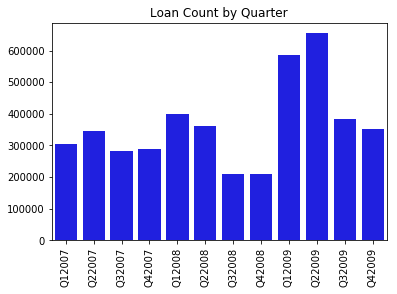

In [184]:
sns.barplot(x= time, y=countLoans, color = 'b')
plt.xticks(rotation=90)
plt.title("Loan Count by Quarter")

For the most part loan distribution remained the relatively similar between 300k and 400k loans per quarter. That being said there was distinct differences in the quarters 3 and 4 of 2008 and  quarters 1 and 2 of 2009. In latter quarters of 2008, there were significantly less loans distributed. In the first two quarters of 2009, there was a large increase in loans distributed (around 600k/quarter). This could be because of the passing of President Obama's "Economic Stimulus Package" in February of 2009.

### Credit Score Over Time

Text(0.5,1,'Avg/Median Credit Scores')

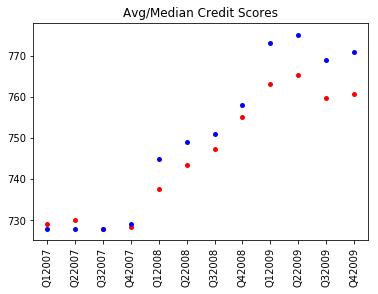

In [183]:
sns.stripplot(x= time, y = avgCredit, color = 'r')
sns.stripplot(x = time, y = medCredit, color= 'b')
plt.xticks(rotation=90)
plt.title("Avg/Median Credit Scores")

The average credit score of borrowers grew over the 2007-2009 period. In the 2007, the average credit score of borrowers sat around 730. Over the course of 2008, the average credit score of borrowers increased linearly to around 755. In 2009 it started to level out in the 760-765 range. Due the peak of the recession occuring over the observed time period (Sep 29, 2008), it could be assumed that as the recession got worse lenders were more restrictive in their distribution of loans.

Similar behavior in median values, albiet less continuous than the average data. Median credit scores for borrowers were consistently in the 725-730 range through 2007, increasing through 2008, and leveling out in 2009. What is interesting is where the median credit scores leveled out at. They are consistently higher than the average credit score showing that the distribution of high credit score borrowers was skewed towards the larger credit score end of the spectrum. 

### Bad Credit Borrowers

Text(0.5,1,'Percentage of Loans given to Borrowers with Bad Credit')

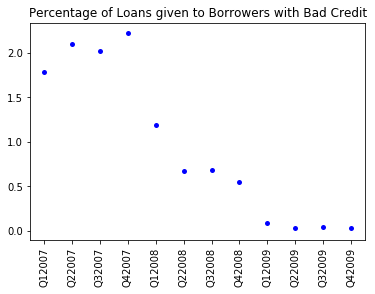

In [182]:
badCredit = sns.stripplot(x = time, y = badCreditList, color= 'b')
plt.xticks(rotation=90)
plt.title("Percentage of Loans given to Borrowers with Bad Credit")

We can see a drastic decrease in the amount of loans given to borrowers with less than 600 credit score. Through 2007, these values were at ~2%. In 2008, the values decreased sharply throughout the year. In 2009, these values remained consistent around 0.035%-0.04% of borrowers.

### Interest Rates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

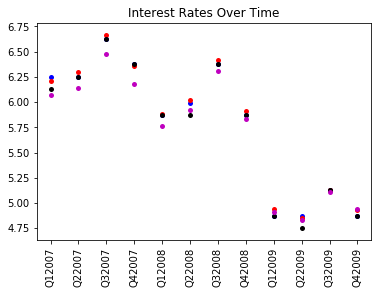

In [204]:
sns.stripplot(x = time, y = medIntList, color= 'b', label = "Orig Median Int")
sns.stripplot(x = time, y = avgIntList, color = 'r', label = "Orig Avg Int")
sns.stripplot(x = time, y = currMedIntList, color = 'k', label = "Current Median Int")
sns.stripplot(x = time, y = currAvgIntList, color = 'm',label = "Current Avg Int")
plt.title("Interest Rates Over Time")
plt.xticks(rotation=90)

For the most part, the four interest rate summary categories examined (origin median interest, origin average interest, current median interest, and current average interest) remained within 0.1% of each other. The general trend though is interesting. Each individual year's interest rates react as a unit. Each year, quarters 1, 2, and 4 have a similar rate, but  quarter 3 has a significantly higher interest rate than the other quarters.  Additionally, there is a trend by year. Year 2007 had the highest interest rates. The interest rates decreased in 2008, and then continued their downward trend int 2009. This phenomon could be explained in part by the increase in quality borrowers. For every passing year, there was an increase in the average credit scores, which would warrant the decrease in the average interest rate for the corresponding loans.

### Delinquent Loans

In [165]:
for i in perfData:
    countDelinquentLoans(i)
print(delinquentList)

[8.099502446932998, 8.960845693174553, 10.175997394171068, 10.072269903265358, 7.8888858633675865, 6.710734474812957, 6.939303521504072, 5.490556771120591, 16.233969814141513, 28.65949445767109, 20.510197976476828, 25.06084969531463]


Text(0.5,1,'Percentage of Delinquent Loan months by Origin Quarter')

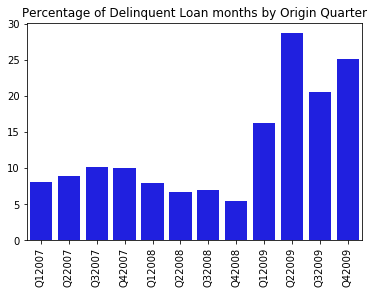

In [180]:
sns.barplot(x= time, y=delinquentList, color = 'b')
plt.xticks(rotation=90)
plt.title("Percentage of Delinquent Loan months by Origin Quarter")

In the above plot we are evaluating the performance of borrowers over time. In 2007, the number of loans that will be delinquent over their life increased from 8% to 10% (Q1 to Q4). That trend reversed immediately in 2008, with decreasing delinquency values from ~8% to 5.5% (Q1 to Q4). Then in 2009, the percentage of delinquent loans over their life balooned up above 25%! This is very surprising and interesting phenomenon. Not sure that there is an explaination for this. Maybe borrowers didn't quite feel immediate relief from the passed legislation and more borrowers went late on their loan payments.

### Actual Loss Distribution

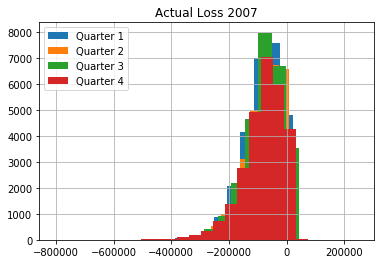

In [178]:
perfQ12007['Actual Loss Calculation'].hist(bins = 20,label= "Quarter 1")
perfQ22007['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 2")
perfQ32007['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 3")
perfQ42007['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 4")
plt.title("Actual Loss 2007")
plt.legend()

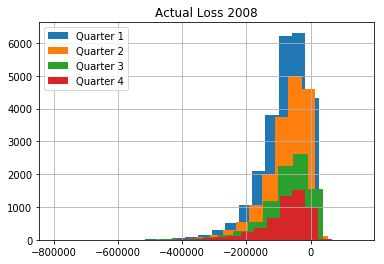

In [179]:
perfQ12008['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 1")
perfQ22008['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 2")
perfQ32008['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 3")
perfQ42008['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 4")
plt.title("Actual Loss 2008")
plt.legend()

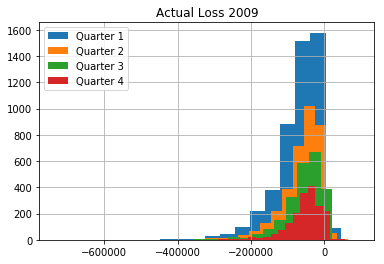

In [177]:
perfQ12009['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 1")
perfQ22009['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 2")
perfQ32009['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 3")
perfQ42009['Actual Loss Calculation'].hist(bins = 20, label= "Quarter 4")
plt.title("Actual Loss 2009")
plt.legend()

In the above three plots, we examined the actual loss data over the 2007-2009 time period. In general we see a large concentration of loans between $0 and $100k. These distributions look very similar, with the difference being the number of loans being sold every quarter. From the plots, we can deduce that the number of loans being sold is decreasing over time.

In [188]:
lossCountList = []

for i in perfData:
    lossCountNo = i['Actual Loss Calculation'].count()
    lossCountList.append(lossCountNo)
print(lossCountList)

[27121, 32206, 26706, 27835, 25019, 17743, 8763, 5447, 4865, 3555, 2313, 1810]


Text(0.5,1,'Loans sold by quarter')

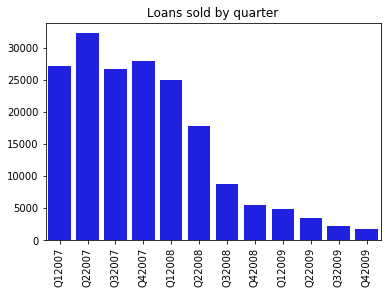

In [190]:
sns.barplot(x = time, y = lossCountList, color= 'b')
plt.xticks(rotation=90)
plt.title("Loans sold by quarter")

This plot emphasizes the point we were just brought up with the number of sold loans decreasing by quarter. Very large discrepancy between the nuumber of loans sold in 2007 versus the number of loans sold in 2009

### Current Actual UPB

In [186]:
currMedUPB = []
currAvgUPB = []

for i in perfData:
    median = i['Current Actual UPB'].median()
    avg = i['Current Actual UPB'].mean()
    currMedUPB.append(median)
    currAvgUPB.append(avg)
print(currMedUPB)
print(currAvgUPB)

[143117.82, 139739.37, 133000.0, 142262.74, 152311.69, 146327.93, 138877.53999999998, 152000.0, 164000.0, 156208.31, 143949.925, 145803.3]
[162223.994376352, 159361.5776315474, 153775.28241849228, 165103.98165345966, 174207.0649900752, 169029.24040251772, 162122.70654427688, 174050.34134312574, 185263.01492451195, 179538.65005451432, 169200.1483333534, 171346.3579557072]


Text(0.5,1,'Avg/Median Current UPB')

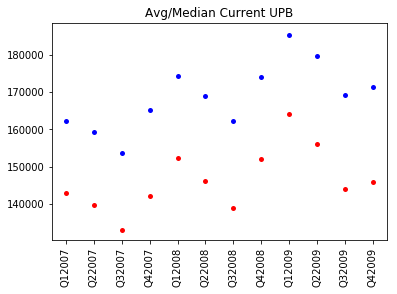

In [187]:
sns.stripplot(x= time, y = currMedUPB, color = 'r')
sns.stripplot(x = time, y = currAvgUPB, color= 'b')
plt.xticks(rotation=90)
plt.title("Avg/Median Current UPB")

This is a very cyclical plot. The median UPB values are in red and the average UPB values are in blue. Every year we see the same cycle start at a yearly max value in quarter 1 decrease to the yearly minimum quarter 3 and increase to nearly the same yearly max in quarter 4. It is important to note that while this plot is cyclical, it is increasing linearly for each year that passes. The cycle seems to break a bit when 2009's quarter 4 median and average values. The median values being less than the average values imply that the distribution of current UPB is skewed towards lower values 

## Location Specific data

In this next section, we will evaluate how location affects loan origination and performance data. We will do this by creating a subset of the data for the Northeast (ME, NH, VT, CT, RI, MA, NY), the South (NC, SC, GA, TN, AL, MS, LA), and the West (CA, AZ, NV, OR, WA)

In [209]:
northeastQ12007 = origQ12007[origQ12007['Property State'].isin(['ME','NH',
                                                                'VT','CT','RI','MA','NY'])]
southQ12007 = origQ12007[origQ12007['Property State'].isin(['NC','SC','GA','TN','AL','MS','LA'])]

westQ12007 = origQ12007[origQ12007['Property State'].isin(['CA','AZ','NV','OR','WA'])]
regionsQ12007 =[northeastQ12007, southQ12007, westQ12007]


In [206]:
northeastQ22007 = origQ22007[origQ22007['Property State'].isin(['ME','NH',
                                                                'VT','CT','RI','MA','NY'])]
southQ22007 = origQ22007[origQ22007['Property State'].isin(['NC','SC','GA','TN','AL','MS','LA'])]

westQ22007 = origQ22007[origQ22007['Property State'].isin(['CA','AZ','NV','OR','WA'])]
regionsQ22007 = [northeastQ22007, southQ22007, westQ22007]

In [207]:
northeastQ32007 = origQ32007[origQ32007['Property State'].isin(['ME','NH',
                                                                'VT','CT','RI','MA','NY'])]
southQ32007 = origQ32007[origQ32007['Property State'].isin(['NC','SC','GA','TN','AL','MS','LA'])]

westQ32007 = origQ32007[origQ32007['Property State'].isin(['CA','AZ','NV','OR','WA'])]
regionsQ32007 = [northeastQ32007, southQ32007, westQ32007]

In [208]:
northeastQ42007 = origQ42007[origQ42007['Property State'].isin(['ME','NH',
                                                                'VT','CT','RI','MA','NY'])]
southQ42007 = origQ42007[origQ42007['Property State'].isin(['NC','SC','GA','TN','AL','MS','LA'])]

westQ42007 = origQ42007[origQ42007['Property State'].isin(['CA','AZ','NV','OR','WA'])]
regionsQ42007 = [northeastQ42007, southQ42007, westQ42007]

In [212]:
regCountListQ12007 = []
regCountListQ22007 = []
regCountListQ32007 = []
regCountListQ42007 = []

for i in regionsQ12007:
    regCount = i['Orig Interest Rate'].count()
    regCountListQ12007.append(regCount)
print(regCountListQ12007)
for i in regionsQ22007:
    regCount = i['Orig Interest Rate'].count()
    regCountListQ22007.append(regCount)
print(regCountListQ22007)
for i in regionsQ32007:
    regCount = i['Orig Interest Rate'].count()
    regCountListQ32007.append(regCount)
print(regCountListQ32007)
for i in regionsQ42007:
    regCount = i['Orig Interest Rate'].count()
    regCountListQ42007.append(regCount)
print(regCountListQ42007)

[26762, 44411, 50309]
[29678, 51064, 52013]
[24242, 43981, 38535]
[24922, 42326, 50474]


In [201]:
regionCat = ['Northeast','South','West']

### Region Loan Count

In [233]:
regLoanCount = pd.DataFrame({'Time': ['Q12007','Q22007','Q32007','Q42007'],
                'Northeast':[regCountListQ12007[0],regCountListQ22007[0],regCountListQ32007[0],
                            regCountListQ42007[0]],
                'South':[regCountListQ12007[1], regCountListQ22007[1],regCountListQ32007[1],
                        regCountListQ42007[1]],
                'West':[regCountListQ12007[2],regCountListQ22007[2], regCountListQ32007[2],
                       regCountListQ42007[2]]})

In [234]:
regLoanCount = regLoanCount.melt('Time', var_name='region',  value_name='loans')

Text(0.5,1,'Loans Issued in 2007')

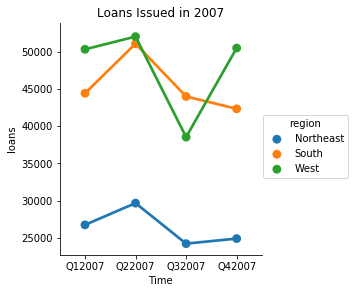

In [235]:
sns.factorplot(x="Time", y="loans", hue='region', data=regLoanCount)
plt.title("Loans Issued in 2007")

Here we can see the count breakdown of loans issued for 2007 in each region. There are a fair amount more loans issued in the South and West regions compared to the Northeast region

### Interest Rate by Region

In [213]:
regIntListQ12007 = []
regIntListQ22007 = []
regIntListQ32007 = []
regIntListQ42007 = []

for i in regionsQ12007:
    regIntMean = i['Orig Interest Rate'].mean()
    regIntListQ12007.append(regIntMean)
print(regIntListQ12007)
for i in regionsQ22007:
    regIntMean = i['Orig Interest Rate'].mean()
    regIntListQ22007.append(regIntMean)
print(regIntListQ22007)
for i in regionsQ32007:
    regIntMean = i['Orig Interest Rate'].mean()
    regIntListQ32007.append(regIntMean)
print(regIntListQ32007)
for i in regionsQ42007:
    regIntMean = i['Orig Interest Rate'].mean()
    regIntListQ42007.append(regIntMean)
print(regIntListQ42007)

[6.184149204095369, 6.176563126252501, 6.142812319863222]
[6.257706280746678, 6.2571299349835465, 6.236920193028659]
[6.632981437175143, 6.632523930788275, 6.605462462696235]
[6.360757884599957, 6.329586471672247, 6.284875975749867]


In [236]:
regAvgIntRate = pd.DataFrame({'Time': ['Q12007','Q22007','Q32007','Q42007'],
                'Northeast':[regIntListQ12007[0],regIntListQ22007[0],regIntListQ32007[0],
                            regIntListQ42007[0]],
                'South':[regIntListQ12007[1], regIntListQ22007[1],regIntListQ32007[1],
                        regIntListQ42007[1]],
                'West':[regIntListQ12007[2],regIntListQ22007[2], regIntListQ32007[2],
                       regIntListQ42007[2]]})
regAvgIntRate = regAvgIntRate.melt('Time', var_name='Region',  value_name='Avg Interest Rate')

Text(0.5,1,'2007 Average Interest Rates by Region')

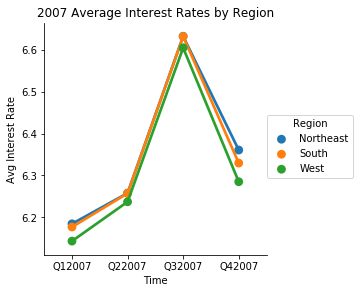

In [237]:
sns.factorplot(x="Time", y="Avg Interest Rate", hue='Region', data=regAvgIntRate)
plt.title("2007 Average Interest Rates by Region")

Average interest rates remain pretty close throughout 2007 and follow the yearly trend as seen before in the analysis. Interestingly the West interest rates are consistently the lowest, while the Northeast has a narrow lead for the largest average interest rates quarterly.